# 🌩️ Lightning Prediction - Comprehensive EDA & Preprocessing

## Dataset Overview
- **Source**: Combined 2023-2025 Bangladesh Weather Data (8 Divisions)
- **Purpose**: Predict lightning occurrence using weather and temporal features
- **Split Strategy**: 
  - **Training**: 2023 data (140,160 rows)
  - **Validation**: 2024 data (140,544 rows)
  - **Testing**: 2025 data (140,160 rows)

## EDA Pipeline Steps:
1. Data Loading & Initial Exploration
2. Missing Values Analysis & Handling
3. Outlier Detection & Removal
4. Feature Engineering
5. Data Normalization
6. Categorical Encoding
7. Target Variable Analysis (Lightning)
8. Year-wise Comparison & Visualization
9. Final Quality Checks
10. Export Preprocessed Data

In [1]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES & LOAD DATA
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Load the dataset
df = pd.read_csv('combined_2023_2025_all_districts_updated.csv')

print("="*80)
print("📊 DATASET OVERVIEW")
print("="*80)
print(f"\n✅ Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n📋 Column Names ({len(df.columns)} columns):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n" + "="*80)
print("🔍 FIRST 5 ROWS")
print("="*80)
df.head()

📊 DATASET OVERVIEW

✅ Dataset Shape: 420,864 rows × 34 columns

📋 Column Names (34 columns):
    1. DateTime
    2. Date
    3. Time
    4. Year
    5. District
    6. Location
    7. Latitude
    8. Longitude
    9. Temperature_C
   10. Humidity_%
   11. Wind_Speed_m/s
   12. Precipitation_mm
   13. Pressure_kPa
   14. Month
   15. Hour
   16. Minute
   17. Lightning_Occurred
   18. Lightning_Probability
   19. Flash_Count
   20. Flash_Density_per_km2
   21. Expected_Flashes
   22. Base_Flash_Rate
   23. Time_Factor
   24. Weather_Factor
   25. Season
   26. Time_Category
   27. Month_Sin
   28. Month_Cos
   29. Hour_Sin
   30. Hour_Cos
   31. Temp_Deviation
   32. Has_Precipitation
   33. High_Humidity
   34. Strong_Wind

🔍 FIRST 5 ROWS


,DateTime,Date,Time,Year,District,Location,Latitude,Longitude,Temperature_C,Humidity_%,...,Season,Time_Category,Month_Sin,Month_Cos,Hour_Sin,Hour_Cos,Temp_Deviation,Has_Precipitation,High_Humidity,Strong_Wind
0,2023-01-01 00:00,2023-01-01,00:00,2023,Barisal,Barisal,22.701,90.3535,15.87,84.22,...,Winter,Night,0.5,0.866025,0.000000,1.000000,-1.859583,0,1,0
1,2023-01-01 00:30,2023-01-01,00:30,2023,Barisal,Barisal,22.701,90.3535,15.87,84.22,...,Winter,Night,0.5,0.866025,0.000000,1.000000,-1.859583,0,1,0
2,2023-01-01 01:00,2023-01-01,01:00,2023,Barisal,Barisal,22.701,90.3535,15.33,87.81,...,Winter,Night,0.5,0.866025,0.258819,0.965926,-2.399583,0,1,0
3,2023-01-01 01:30,2023-01-01,01:30,2023,Barisal,Barisal,22.701,90.3535,15.33,87.81,...,Winter,Night,0.5,0.866025,0.258819,0.965926,-2.399583,0,1,0
4,2023-01-01 02:00,2023-01-01,02:00,2023,Barisal,Barisal,22.701,90.3535,14.90,90.73,...,Winter,Night,0.5,0.866025,0.500000,0.866025,-2.829583,0,1,0


In [2]:
# =============================================================================
# DATA TYPES & BASIC STATISTICS
# =============================================================================

print("📊 DATA TYPES:")
print(df.dtypes)

print("\n" + "="*80)
print("📈 BASIC STATISTICS (Numerical Columns)")
print("="*80)
df.describe().round(2)

📊 DATA TYPES:
DateTime                     str
Date                         str
Time                         str
Year                       int64
District                     str
Location                     str
Latitude                 float64
Longitude                float64
Temperature_C            float64
Humidity_%               float64
Wind_Speed_m/s           float64
Precipitation_mm         float64
Pressure_kPa             float64
Month                      int64
Hour                       int64
Minute                     int64
Lightning_Occurred         int64
Lightning_Probability    float64
Flash_Count                int64
Flash_Density_per_km2    float64
Expected_Flashes         float64
Base_Flash_Rate          float64
Time_Factor              float64
Weather_Factor           float64
Season                       str
Time_Category                str
Month_Sin                float64
Month_Cos                float64
Hour_Sin                 float64
Hour_Cos                 floa

,Year,Latitude,Longitude,Temperature_C,Humidity_%,Wind_Speed_m/s,Precipitation_mm,Pressure_kPa,Month,Hour,...,Time_Factor,Weather_Factor,Month_Sin,Month_Cos,Hour_Sin,Hour_Cos,Temp_Deviation,Has_Precipitation,High_Humidity,Strong_Wind
count,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,0.0,420864.00,420864.00,...,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00,420864.00
mean,2024.00,23.93,90.28,25.53,76.55,1.86,8.57,NaN,6.52,11.50,...,0.80,1.92,-0.00,-0.00,-0.00,-0.00,-0.00,0.57,0.70,0.02
std,0.82,1.13,1.07,5.64,19.06,1.14,24.61,NaN,3.45,6.92,...,0.49,0.67,0.71,0.71,0.71,0.71,3.31,0.49,0.46,0.13
min,2023.00,22.36,88.60,6.34,6.01,0.01,0.00,NaN,1.00,0.00,...,0.20,1.00,-1.00,-1.00,-1.00,-1.00,-10.14,0.00,0.00,0.00
25%,2023.00,22.81,89.47,22.29,65.68,1.06,0.00,NaN,4.00,5.75,...,0.42,1.30,-0.87,-0.87,-0.71,-0.71,-2.26,0.00,0.00,0.00
50%,2024.00,24.09,90.38,26.72,81.25,1.56,0.17,NaN,7.00,11.50,...,0.75,1.98,-0.00,-0.00,0.00,-0.00,-0.52,1.00,1.00,0.00
75%,2025.00,24.78,90.76,29.19,92.36,2.41,6.91,NaN,10.00,17.25,...,1.12,2.57,0.50,0.87,0.71,0.71,2.33,1.00,1.00,0.00
max,2025.00,25.74,91.87,47.14,100.00,14.06,1270.57,NaN,12.00,23.00,...,1.50,3.09,1.00,1.00,1.00,1.00,11.12,1.00,1.00,1.00


## 📅 Step 2: Separate Data by Year (Train/Validation/Test Split)

📊 YEAR-WISE DATA DISTRIBUTION

🎯 Training Set (2023):   140,160 rows (33.3%)
🎯 Validation Set (2024): 140,544 rows (33.4%)
🎯 Test Set (2025):       140,160 rows (33.3%)

⚡ LIGHTNING RATE BY YEAR

Training (2023):
   ⚡ Lightning Events: 51,815 (36.97%)
   ☀️  No Lightning:     88,345 (63.03%)

Validation (2024):
   ⚡ Lightning Events: 53,295 (37.92%)
   ☀️  No Lightning:     87,249 (62.08%)

Test (2025):
   ⚡ Lightning Events: 53,015 (37.82%)
   ☀️  No Lightning:     87,145 (62.18%)


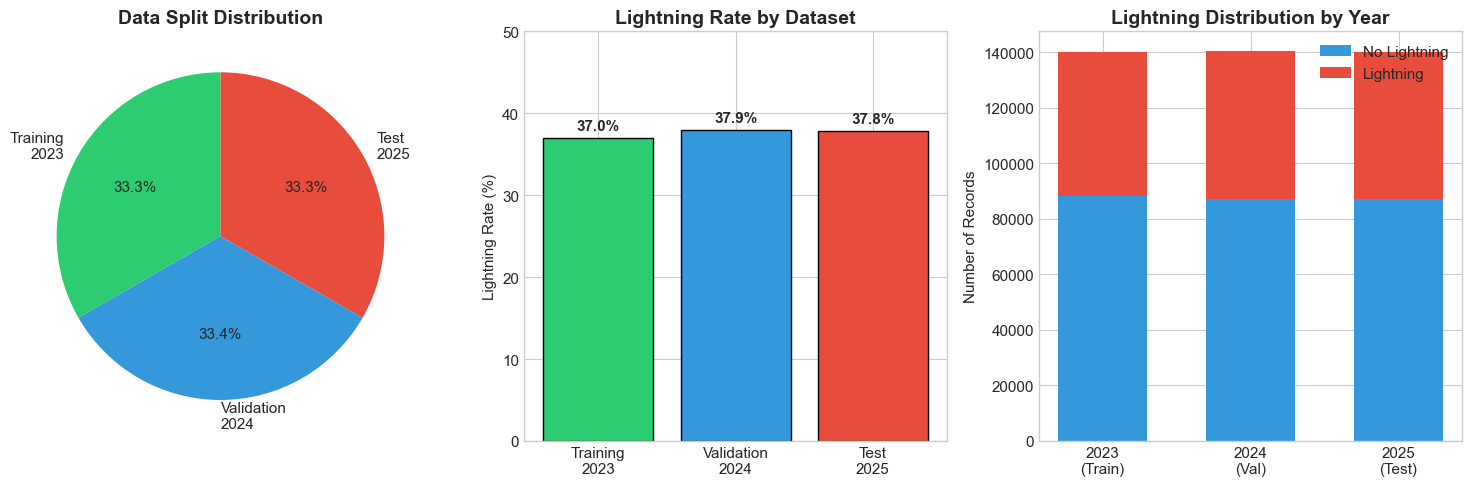

In [3]:
# =============================================================================
# STEP 2: SEPARATE DATA BY YEAR
# =============================================================================

# Convert DateTime to proper datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Split data by year
df_train = df[df['Year'] == 2023].copy()  # Training data
df_val = df[df['Year'] == 2024].copy()    # Validation data  
df_test = df[df['Year'] == 2025].copy()   # Test data

print("="*80)
print("📊 YEAR-WISE DATA DISTRIBUTION")
print("="*80)
print(f"\n🎯 Training Set (2023):   {len(df_train):,} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"🎯 Validation Set (2024): {len(df_val):,} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"🎯 Test Set (2025):       {len(df_test):,} rows ({len(df_test)/len(df)*100:.1f}%)")

print("\n" + "="*80)
print("⚡ LIGHTNING RATE BY YEAR")
print("="*80)
for name, data in [('Training (2023)', df_train), ('Validation (2024)', df_val), ('Test (2025)', df_test)]:
    lightning_rate = data['Lightning_Occurred'].mean() * 100
    lightning_count = data['Lightning_Occurred'].sum()
    no_lightning_count = len(data) - lightning_count
    print(f"\n{name}:")
    print(f"   ⚡ Lightning Events: {lightning_count:,} ({lightning_rate:.2f}%)")
    print(f"   ☀️  No Lightning:     {no_lightning_count:,} ({100-lightning_rate:.2f}%)")

# Visualize the split
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['#2ecc71', '#3498db', '#e74c3c']
labels = ['Training\n2023', 'Validation\n2024', 'Test\n2025']
sizes = [len(df_train), len(df_val), len(df_test)]

# Pie chart for data distribution
axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Data Split Distribution', fontsize=14, fontweight='bold')

# Bar chart for lightning rates
lightning_rates = [df_train['Lightning_Occurred'].mean()*100, 
                   df_val['Lightning_Occurred'].mean()*100,
                   df_test['Lightning_Occurred'].mean()*100]
bars = axes[1].bar(labels, lightning_rates, color=colors, edgecolor='black')
axes[1].set_ylabel('Lightning Rate (%)')
axes[1].set_title('Lightning Rate by Dataset', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 50)
for bar, rate in zip(bars, lightning_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', fontweight='bold')

# Lightning vs No Lightning stacked bar
lightning_counts = [df_train['Lightning_Occurred'].sum(), df_val['Lightning_Occurred'].sum(), df_test['Lightning_Occurred'].sum()]
no_lightning_counts = [len(df_train) - lightning_counts[0], len(df_val) - lightning_counts[1], len(df_test) - lightning_counts[2]]

x = np.arange(3)
width = 0.6
axes[2].bar(x, no_lightning_counts, width, label='No Lightning', color='#3498db')
axes[2].bar(x, lightning_counts, width, bottom=no_lightning_counts, label='Lightning', color='#e74c3c')
axes[2].set_xticks(x)
axes[2].set_xticklabels(['2023\n(Train)', '2024\n(Val)', '2025\n(Test)'])
axes[2].set_ylabel('Number of Records')
axes[2].set_title('Lightning Distribution by Year', fontsize=14, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

## 🔍 Step 3: Missing Values Analysis & Handling

🔍 MISSING VALUES ANALYSIS

⚠️ Columns with Missing Values:
              Missing Count  Missing %
Pressure_kPa         420864      100.0


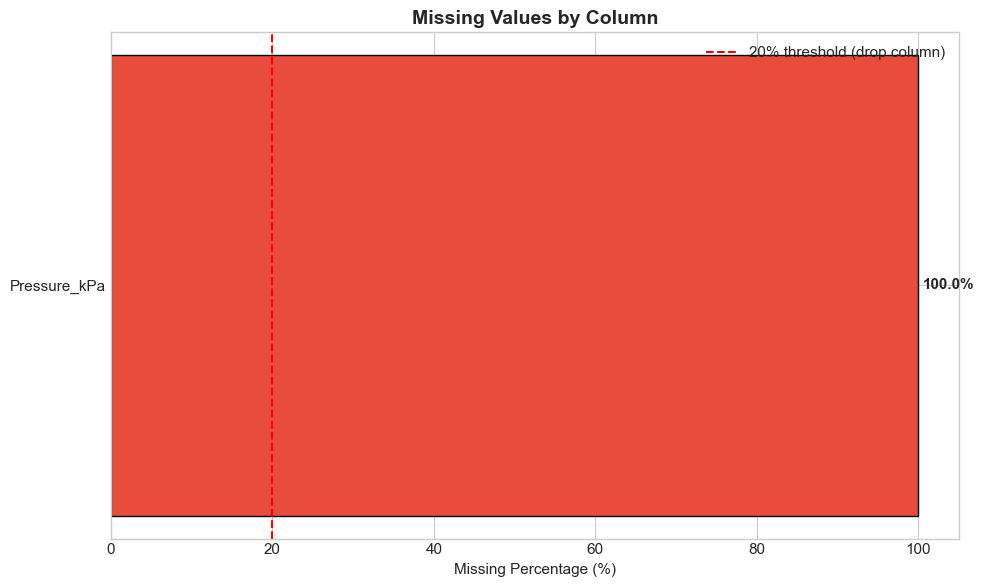


📅 MISSING VALUES BY YEAR
2023 (Train): 140,160 missing values
2024 (Val): 140,544 missing values
2025 (Test): 140,160 missing values


In [4]:
# =============================================================================
# STEP 3: MISSING VALUES ANALYSIS
# =============================================================================

print("="*80)
print("🔍 MISSING VALUES ANALYSIS")
print("="*80)

# Calculate missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

# Filter columns with missing values
missing_cols = missing_df[missing_df['Missing Count'] > 0]

if len(missing_cols) > 0:
    print("\n⚠️ Columns with Missing Values:")
    print(missing_cols)
    
    # Visualize missing values
    if len(missing_cols) <= 10:
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['#e74c3c' if pct > 20 else '#f39c12' if pct > 5 else '#2ecc71' 
                  for pct in missing_cols['Missing %']]
        bars = ax.barh(missing_cols.index, missing_cols['Missing %'], color=colors, edgecolor='black')
        ax.set_xlabel('Missing Percentage (%)')
        ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
        ax.axvline(x=20, color='red', linestyle='--', label='20% threshold (drop column)')
        ax.legend()
        for bar, pct in zip(bars, missing_cols['Missing %']):
            ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{pct:.1f}%', va='center', fontweight='bold')
        plt.tight_layout()
        plt.show()
else:
    print("\n✅ No missing values found in the dataset!")

# Check missing values by year
print("\n" + "="*80)
print("📅 MISSING VALUES BY YEAR")
print("="*80)
for name, data in [('2023 (Train)', df_train), ('2024 (Val)', df_val), ('2025 (Test)', df_test)]:
    total_missing = data.isnull().sum().sum()
    print(f"{name}: {total_missing:,} missing values")

In [5]:
# =============================================================================
# HANDLE MISSING VALUES
# =============================================================================

print("="*80)
print("🔧 HANDLING MISSING VALUES")
print("="*80)

# Drop Pressure_kPa column (100% missing)
if 'Pressure_kPa' in df.columns:
    print("\n❌ Dropping 'Pressure_kPa' column (100% missing)")
    df = df.drop(columns=['Pressure_kPa'])
    df_train = df_train.drop(columns=['Pressure_kPa'])
    df_val = df_val.drop(columns=['Pressure_kPa'])
    df_test = df_test.drop(columns=['Pressure_kPa'])
    print(f"✅ New shape: {df.shape}")

# Verify no missing values remain
remaining_missing = df.isnull().sum().sum()
print(f"\n✅ Remaining missing values: {remaining_missing}")

# Show updated columns
print(f"\n📋 Updated columns ({len(df.columns)}):")
print(df.columns.tolist())

🔧 HANDLING MISSING VALUES

❌ Dropping 'Pressure_kPa' column (100% missing)
✅ New shape: (420864, 33)

✅ Remaining missing values: 0

📋 Updated columns (33):
['DateTime', 'Date', 'Time', 'Year', 'District', 'Location', 'Latitude', 'Longitude', 'Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm', 'Month', 'Hour', 'Minute', 'Lightning_Occurred', 'Lightning_Probability', 'Flash_Count', 'Flash_Density_per_km2', 'Expected_Flashes', 'Base_Flash_Rate', 'Time_Factor', 'Weather_Factor', 'Season', 'Time_Category', 'Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos', 'Temp_Deviation', 'Has_Precipitation', 'High_Humidity', 'Strong_Wind']


## 📊 Step 4: Outlier Detection & Removal

📊 OUTLIER DETECTION - PHYSICAL LIMITS

📈 Current Weather Variable Ranges:

⚠️ Temperature_C:
   Current Range: [6.34, 47.14]
   Physical Limits: [10, 45]
   Below Limit: 1,184 | Above Limit: 36

⚠️ Humidity_%:
   Current Range: [6.01, 100.00]
   Physical Limits: [30, 100]
   Below Limit: 11,648 | Above Limit: 0

✅ Wind_Speed_m/s:
   Current Range: [0.01, 14.06]
   Physical Limits: [0, 15]
   Below Limit: 0 | Above Limit: 0

⚠️ Precipitation_mm:
   Current Range: [0.00, 1270.57]
   Physical Limits: [0, 100]
   Below Limit: 0 | Above Limit: 4,660


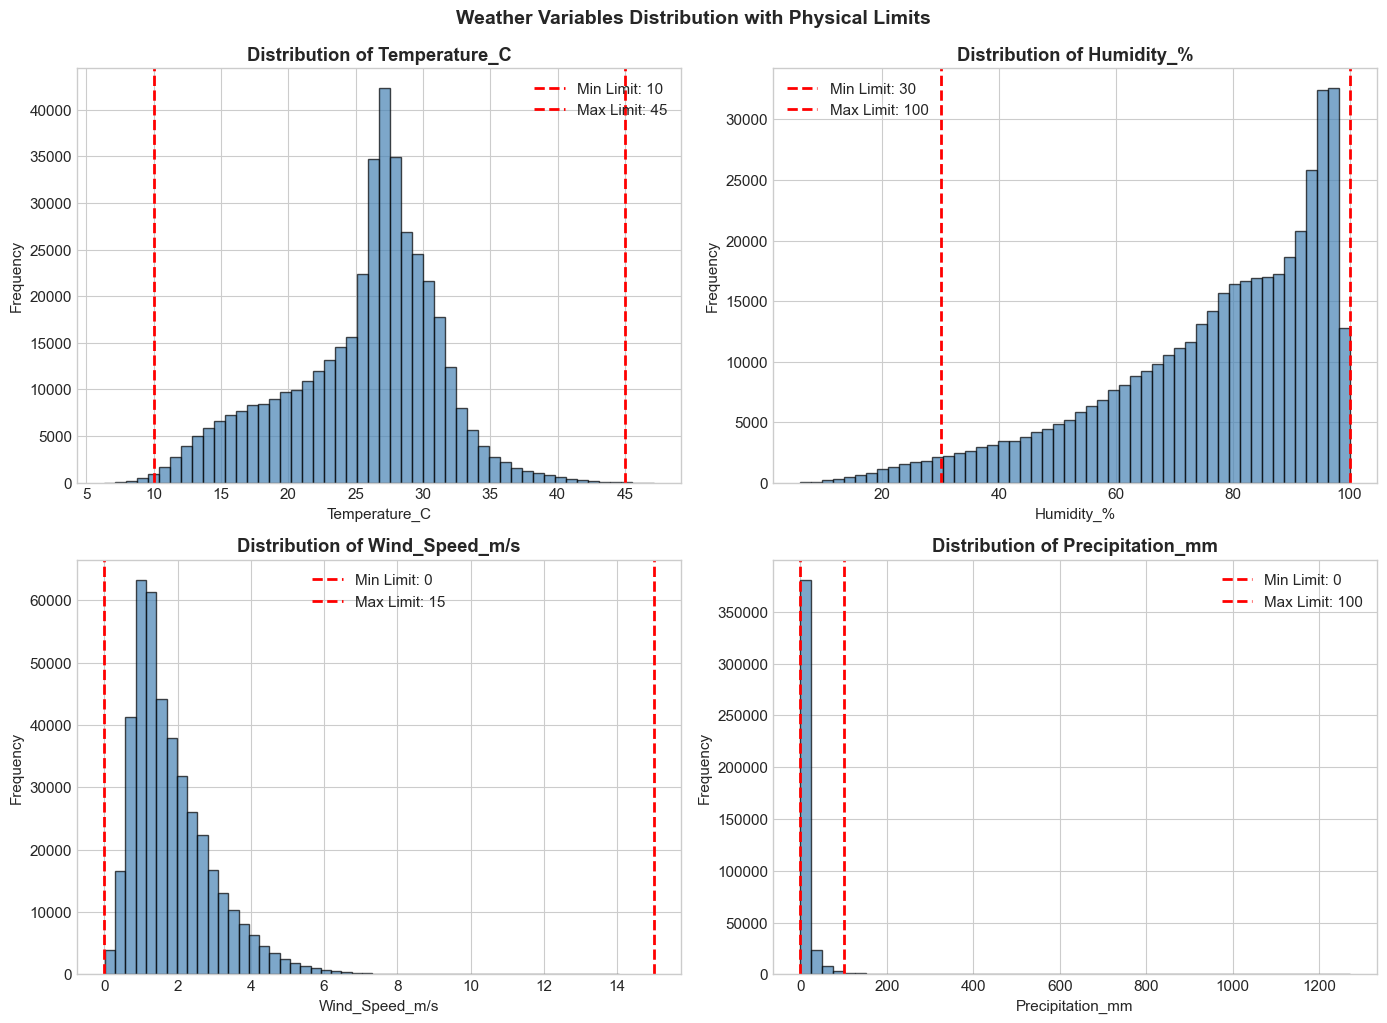

In [6]:
# =============================================================================
# STEP 4: OUTLIER DETECTION - PHYSICAL LIMITS (Bangladesh Climate)
# =============================================================================

print("="*80)
print("📊 OUTLIER DETECTION - PHYSICAL LIMITS")
print("="*80)

# Define physical limits for Bangladesh climate
physical_limits = {
    'Temperature_C': (10, 45),      # Bangladesh temp range
    'Humidity_%': (30, 100),        # Valid humidity range
    'Wind_Speed_m/s': (0, 15),      # Realistic wind speed
    'Precipitation_mm': (0, 100)     # 30-min precipitation limit
}

# Check current values against physical limits
print("\n📈 Current Weather Variable Ranges:")
weather_cols = ['Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm']

for col in weather_cols:
    min_val, max_val = df[col].min(), df[col].max()
    phys_min, phys_max = physical_limits[col]
    below_limit = (df[col] < phys_min).sum()
    above_limit = (df[col] > phys_max).sum()
    status = "✅" if below_limit == 0 and above_limit == 0 else "⚠️"
    
    print(f"\n{status} {col}:")
    print(f"   Current Range: [{min_val:.2f}, {max_val:.2f}]")
    print(f"   Physical Limits: [{phys_min}, {phys_max}]")
    print(f"   Below Limit: {below_limit:,} | Above Limit: {above_limit:,}")

# Visualize distributions with physical limits
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(weather_cols):
    ax = axes[idx]
    phys_min, phys_max = physical_limits[col]
    
    # Histogram
    ax.hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(phys_min, color='red', linestyle='--', linewidth=2, label=f'Min Limit: {phys_min}')
    ax.axvline(phys_max, color='red', linestyle='--', linewidth=2, label=f'Max Limit: {phys_max}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.suptitle('Weather Variables Distribution with Physical Limits', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [7]:
# =============================================================================
# OUTLIER DETECTION - IQR METHOD
# =============================================================================

print("="*80)
print("📊 OUTLIER DETECTION - IQR METHOD")
print("="*80)

def detect_outliers_iqr(data, column, multiplier=1.5):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers_below = (data[column] < lower_bound).sum()
    outliers_above = (data[column] > upper_bound).sum()
    
    return lower_bound, upper_bound, outliers_below, outliers_above

# Analyze outliers for each weather variable
print("\n📈 IQR-Based Outlier Analysis:")
outlier_summary = []

for col in weather_cols:
    lower, upper, below, above = detect_outliers_iqr(df, col)
    total_outliers = below + above
    pct_outliers = total_outliers / len(df) * 100
    
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outliers Below': below,
        'Outliers Above': above,
        'Total Outliers': total_outliers,
        'Outlier %': pct_outliers
    })
    
    print(f"\n{col}:")
    print(f"   IQR Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"   Outliers: {total_outliers:,} ({pct_outliers:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "="*80)
print("📋 OUTLIER SUMMARY TABLE")
print("="*80)
outlier_df

📊 OUTLIER DETECTION - IQR METHOD

📈 IQR-Based Outlier Analysis:

Temperature_C:
   IQR Bounds: [11.94, 39.54]
   Outliers: 7,614 (1.81%)

Humidity_%:
   IQR Bounds: [25.66, 132.38]
   Outliers: 7,274 (1.73%)

Wind_Speed_m/s:
   IQR Bounds: [-0.97, 4.44]
   Outliers: 14,032 (3.33%)

Precipitation_mm:
   IQR Bounds: [-10.37, 17.27]
   Outliers: 58,104 (13.81%)

📋 OUTLIER SUMMARY TABLE


,Column,Lower Bound,Upper Bound,Outliers Below,Outliers Above,Total Outliers,Outlier %
0,Temperature_C,11.940,39.540,5788,1826,7614,1.809135
1,Humidity_%,25.660,132.380,7274,0,7274,1.728349
2,Wind_Speed_m/s,-0.965,4.435,0,14032,14032,3.334094
3,Precipitation_mm,-10.365,17.275,0,58104,58104,13.805885


🔧 APPLYING OUTLIER HANDLING
✅ Clipped Temperature_C to [10, 45]
✅ Clipped Humidity_% to [30, 100]
✅ Clipped Wind_Speed_m/s to [0, 15]
✅ Clipped Precipitation_mm to [0, 100]

📈 New Weather Variable Ranges (After Clipping):
   Temperature_C: [10.00, 45.00]
   Humidity_%: [30.00, 100.00]
   Wind_Speed_m/s: [0.01, 14.06]
   Precipitation_mm: [0.00, 100.00]


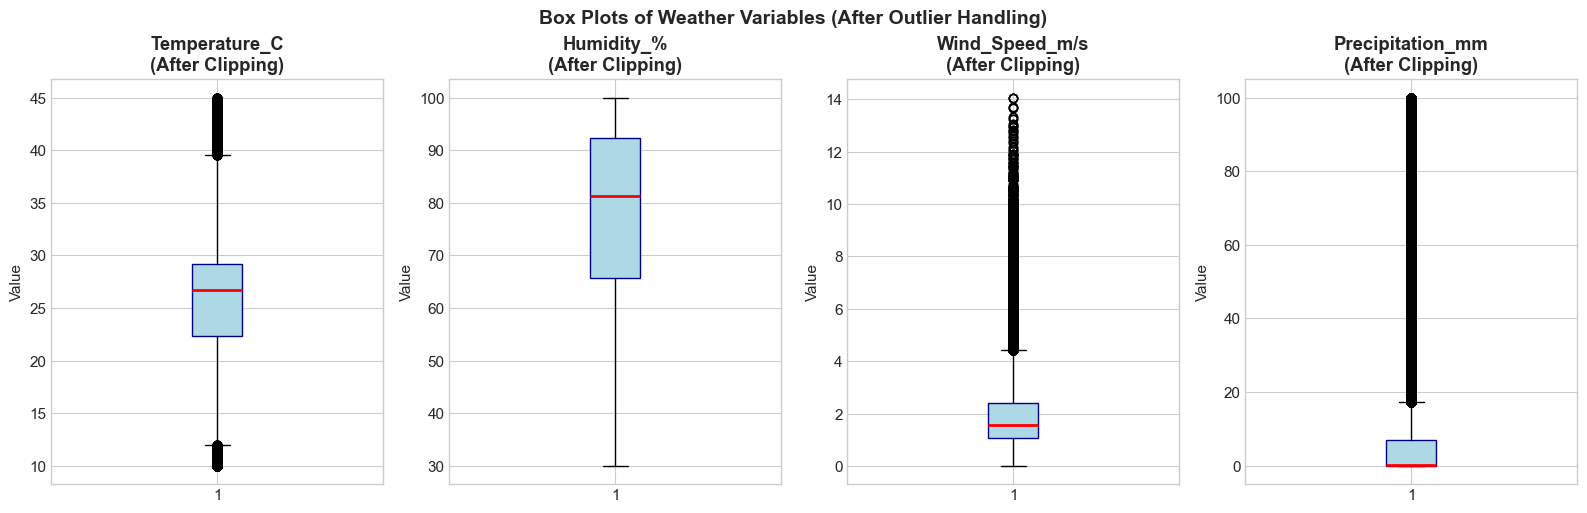


✅ Data shape preserved: 420,864 rows


In [8]:
# =============================================================================
# APPLY OUTLIER HANDLING - CLIP TO PHYSICAL LIMITS
# =============================================================================

print("="*80)
print("🔧 APPLYING OUTLIER HANDLING")
print("="*80)

# Store original shape
original_shape = df.shape[0]

# Apply physical limits clipping
for col, (min_val, max_val) in physical_limits.items():
    # Clip values to physical limits
    df[col] = df[col].clip(lower=min_val, upper=max_val)
    df_train[col] = df_train[col].clip(lower=min_val, upper=max_val)
    df_val[col] = df_val[col].clip(lower=min_val, upper=max_val)
    df_test[col] = df_test[col].clip(lower=min_val, upper=max_val)
    print(f"✅ Clipped {col} to [{min_val}, {max_val}]")

# Verify new ranges
print("\n📈 New Weather Variable Ranges (After Clipping):")
for col in weather_cols:
    print(f"   {col}: [{df[col].min():.2f}, {df[col].max():.2f}]")

# Visualize box plots before/after (showing current state)
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for idx, col in enumerate(weather_cols):
    axes[idx].boxplot(df[col].values, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='navy'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col}\n(After Clipping)', fontweight='bold')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.suptitle('Box Plots of Weather Variables (After Outlier Handling)', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(f"\n✅ Data shape preserved: {df.shape[0]:,} rows")

## 🔧 Step 5: Feature Engineering

In [9]:
# =============================================================================
# STEP 5: FEATURE ENGINEERING
# =============================================================================

print("="*80)
print("🔧 FEATURE ENGINEERING")
print("="*80)

# Check existing features
existing_features = ['Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos', 'Season', 
                     'Time_Category', 'Temp_Deviation', 'Has_Precipitation', 
                     'High_Humidity', 'Strong_Wind']

print("\n✅ Existing Features Already in Dataset:")
for feat in existing_features:
    if feat in df.columns:
        print(f"   ✓ {feat}")
    else:
        print(f"   ✗ {feat} (missing)")

# Create additional weather-based features
print("\n🔧 Creating New Features:")

def create_features(data):
    """Create additional features for lightning prediction"""
    df_new = data.copy()
    
    # 1. Dewpoint Temperature: Td = T - ((100 - Humidity) / 5)
    df_new['Dewpoint_C'] = df_new['Temperature_C'] - ((100 - df_new['Humidity_%']) / 5)
    
    # 2. Temperature-Humidity Index (THI) - Heat Index approximation
    df_new['Temp_Humidity_Index'] = (0.8 * df_new['Temperature_C'] + 
                                      (df_new['Humidity_%'] / 100) * 
                                      (df_new['Temperature_C'] - 14.4) + 46.4)
    
    # 3. Relative humidity categories
    df_new['Humidity_Category'] = pd.cut(df_new['Humidity_%'], 
                                          bins=[0, 50, 70, 85, 100],
                                          labels=['Low', 'Medium', 'High', 'Very High'])
    
    # 4. Temperature categories
    df_new['Temp_Category'] = pd.cut(df_new['Temperature_C'],
                                      bins=[0, 20, 30, 40, 50],
                                      labels=['Cool', 'Warm', 'Hot', 'Very Hot'])
    
    # 5. Is Pre-monsoon season (high lightning season)
    df_new['Is_PreMonsoon'] = (df_new['Season'] == 'Pre-Monsoon').astype(int)
    
    # 6. Is Afternoon (peak lightning time)
    df_new['Is_Afternoon'] = (df_new['Time_Category'] == 'Afternoon').astype(int)
    
    # 7. Combined instability indicator
    df_new['Instability_Score'] = (
        (df_new['Temperature_C'] - df_new['Dewpoint_C']) / 10 +  # Higher = less stable
        df_new['Wind_Speed_m/s'] / 5 +  # Wind contribution
        df_new['Has_Precipitation'] * 2  # Precipitation indicates instability
    )
    
    return df_new

# Apply feature engineering
df = create_features(df)
df_train = create_features(df_train)
df_val = create_features(df_val)
df_test = create_features(df_test)

new_features = ['Dewpoint_C', 'Temp_Humidity_Index', 'Humidity_Category', 
                'Temp_Category', 'Is_PreMonsoon', 'Is_Afternoon', 'Instability_Score']

print("\n✅ New Features Created:")
for feat in new_features:
    print(f"   + {feat}")

print(f"\n📊 Updated Dataset Shape: {df.shape}")
print(f"\n📋 All Columns ({len(df.columns)}):")
print(df.columns.tolist())

🔧 FEATURE ENGINEERING

✅ Existing Features Already in Dataset:
   ✓ Month_Sin
   ✓ Month_Cos
   ✓ Hour_Sin
   ✓ Hour_Cos
   ✓ Season
   ✓ Time_Category
   ✓ Temp_Deviation
   ✓ Has_Precipitation
   ✓ High_Humidity
   ✓ Strong_Wind

🔧 Creating New Features:

✅ New Features Created:
   + Dewpoint_C
   + Temp_Humidity_Index
   + Humidity_Category
   + Temp_Category
   + Is_PreMonsoon
   + Is_Afternoon
   + Instability_Score

📊 Updated Dataset Shape: (420864, 40)

📋 All Columns (40):
['DateTime', 'Date', 'Time', 'Year', 'District', 'Location', 'Latitude', 'Longitude', 'Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm', 'Month', 'Hour', 'Minute', 'Lightning_Occurred', 'Lightning_Probability', 'Flash_Count', 'Flash_Density_per_km2', 'Expected_Flashes', 'Base_Flash_Rate', 'Time_Factor', 'Weather_Factor', 'Season', 'Time_Category', 'Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos', 'Temp_Deviation', 'Has_Precipitation', 'High_Humidity', 'Strong_Wind', 'Dewpoint_C', 'Temp_Humidi

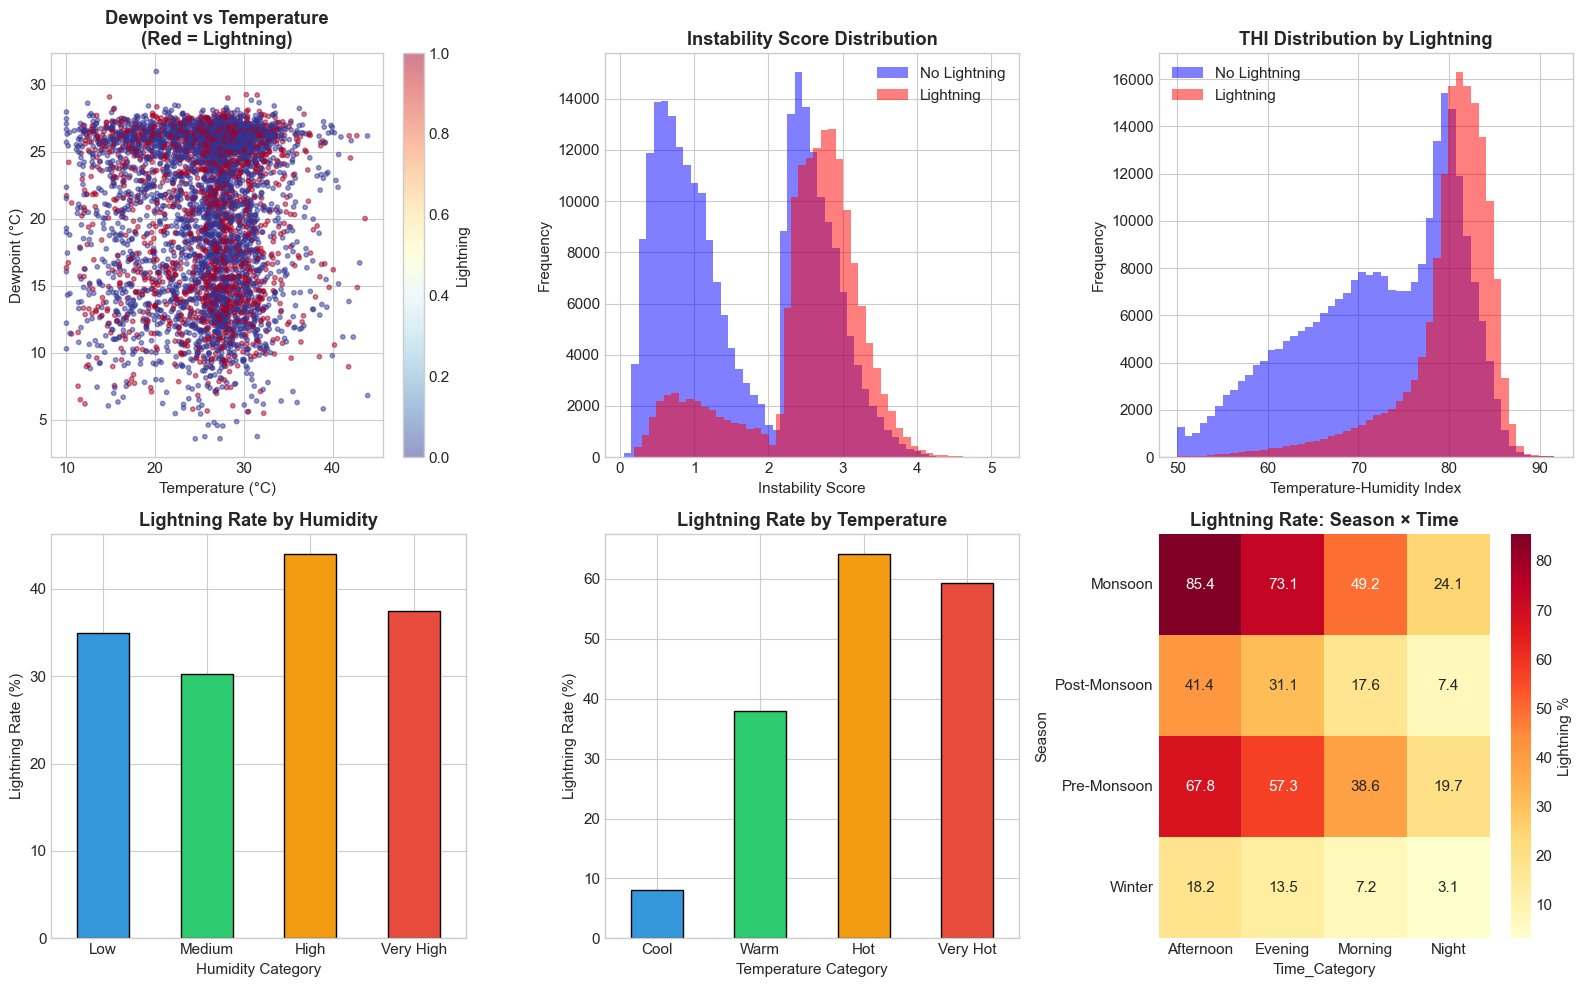

In [10]:
# =============================================================================
# VISUALIZE NEW FEATURES
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Dewpoint vs Temperature colored by Lightning
ax = axes[0, 0]
scatter = ax.scatter(df.sample(5000)['Temperature_C'], 
                     df.sample(5000)['Dewpoint_C'],
                     c=df.sample(5000)['Lightning_Occurred'], 
                     cmap='RdYlBu_r', alpha=0.5, s=10)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Dewpoint (°C)')
ax.set_title('Dewpoint vs Temperature\n(Red = Lightning)', fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Lightning')

# 2. Instability Score distribution by Lightning
ax = axes[0, 1]
df[df['Lightning_Occurred']==0]['Instability_Score'].hist(ax=ax, bins=50, alpha=0.5, label='No Lightning', color='blue')
df[df['Lightning_Occurred']==1]['Instability_Score'].hist(ax=ax, bins=50, alpha=0.5, label='Lightning', color='red')
ax.set_xlabel('Instability Score')
ax.set_ylabel('Frequency')
ax.set_title('Instability Score Distribution', fontweight='bold')
ax.legend()

# 3. Temperature-Humidity Index distribution
ax = axes[0, 2]
df[df['Lightning_Occurred']==0]['Temp_Humidity_Index'].hist(ax=ax, bins=50, alpha=0.5, label='No Lightning', color='blue')
df[df['Lightning_Occurred']==1]['Temp_Humidity_Index'].hist(ax=ax, bins=50, alpha=0.5, label='Lightning', color='red')
ax.set_xlabel('Temperature-Humidity Index')
ax.set_ylabel('Frequency')
ax.set_title('THI Distribution by Lightning', fontweight='bold')
ax.legend()

# 4. Lightning rate by Humidity Category
ax = axes[1, 0]
lightning_by_humidity = df.groupby('Humidity_Category')['Lightning_Occurred'].mean() * 100
lightning_by_humidity.plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black')
ax.set_xlabel('Humidity Category')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Humidity', fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# 5. Lightning rate by Temperature Category
ax = axes[1, 1]
lightning_by_temp = df.groupby('Temp_Category')['Lightning_Occurred'].mean() * 100
lightning_by_temp.plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black')
ax.set_xlabel('Temperature Category')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Temperature', fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# 6. Season + Time Category heatmap
ax = axes[1, 2]
pivot = df.groupby(['Season', 'Time_Category'])['Lightning_Occurred'].mean().unstack() * 100
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Lightning %'})
ax.set_title('Lightning Rate: Season × Time', fontweight='bold')

plt.tight_layout()
plt.show()

## 📏 Step 6: Data Normalization (Z-Score Standardization)

In [11]:
# =============================================================================
# STEP 6: DATA NORMALIZATION (Z-Score)
# =============================================================================

print("="*80)
print("📏 DATA NORMALIZATION (Z-Score Standardization)")
print("="*80)

# Define numerical features to normalize
numerical_features = [
    'Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm',
    'Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos', 'Temp_Deviation',
    'Dewpoint_C', 'Temp_Humidity_Index', 'Instability_Score',
    'Lightning_Probability', 'Flash_Density_per_km2', 'Expected_Flashes',
    'Base_Flash_Rate', 'Time_Factor', 'Weather_Factor'
]

# Filter to only existing columns
numerical_features = [col for col in numerical_features if col in df_train.columns]

print(f"\n📋 Features to Normalize ({len(numerical_features)}):")
for feat in numerical_features:
    print(f"   • {feat}")

# Calculate mean and std from TRAINING data only (important!)
print("\n🔧 Calculating normalization parameters from TRAINING data only...")
train_means = df_train[numerical_features].mean()
train_stds = df_train[numerical_features].std()

# Store normalization parameters
norm_params = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': train_means.values,
    'Std': train_stds.values
})
print("\n📊 Normalization Parameters (from Training Set):")
print(norm_params.round(4))

# Apply Z-score normalization
def normalize_data(data, means, stds, features):
    """Apply Z-score normalization: (x - mean) / std"""
    df_norm = data.copy()
    for feat in features:
        df_norm[f'{feat}_norm'] = (df_norm[feat] - means[feat]) / stds[feat]
    return df_norm

# Apply normalization to all splits
df_train_norm = normalize_data(df_train, train_means, train_stds, numerical_features)
df_val_norm = normalize_data(df_val, train_means, train_stds, numerical_features)
df_test_norm = normalize_data(df_test, train_means, train_stds, numerical_features)

print("\n✅ Normalization Applied to All Splits")
print(f"   Training: {df_train_norm.shape}")
print(f"   Validation: {df_val_norm.shape}")
print(f"   Test: {df_test_norm.shape}")

# Verify normalization on training data
print("\n📈 Verification (Training Set - Normalized Features):")
norm_cols = [f'{feat}_norm' for feat in numerical_features[:5]]
print(f"   Mean (should be ~0): {df_train_norm[norm_cols].mean().values.round(4)}")
print(f"   Std (should be ~1):  {df_train_norm[norm_cols].std().values.round(4)}")

📏 DATA NORMALIZATION (Z-Score Standardization)

📋 Features to Normalize (18):
   • Temperature_C
   • Humidity_%
   • Wind_Speed_m/s
   • Precipitation_mm
   • Month_Sin
   • Month_Cos
   • Hour_Sin
   • Hour_Cos
   • Temp_Deviation
   • Dewpoint_C
   • Temp_Humidity_Index
   • Instability_Score
   • Lightning_Probability
   • Flash_Density_per_km2
   • Expected_Flashes
   • Base_Flash_Rate
   • Time_Factor
   • Weather_Factor

🔧 Calculating normalization parameters from TRAINING data only...

📊 Normalization Parameters (from Training Set):
                  Feature     Mean      Std
0           Temperature_C  25.7696   5.4534
1              Humidity_%  75.4025  18.9053
2          Wind_Speed_m/s   1.8080   1.0554
3        Precipitation_mm   7.2885  16.2981
4               Month_Sin  -0.0054   0.7056
5               Month_Cos  -0.0024   0.7086
6                Hour_Sin  -0.0000   0.7071
7                Hour_Cos  -0.0000   0.7071
8          Temp_Deviation  -0.0000   3.3636
9            

## 🏷️ Step 7: Categorical Encoding

In [12]:
# =============================================================================
# STEP 7: CATEGORICAL ENCODING
# =============================================================================

print("="*80)
print("🏷️ CATEGORICAL ENCODING")
print("="*80)

# Identify categorical columns
categorical_cols = ['District', 'Location', 'Season', 'Time_Category', 'Humidity_Category', 'Temp_Category']
categorical_cols = [col for col in categorical_cols if col in df_train_norm.columns]

print(f"\n📋 Categorical Columns to Encode:")
for col in categorical_cols:
    unique_vals = df_train_norm[col].nunique()
    print(f"   • {col}: {unique_vals} unique values")

# 1. DISTRICT ENCODING - Target Encoding (replace with lightning rate)
print("\n" + "-"*60)
print("1️⃣ District Encoding (Target Encoding based on Lightning Rate)")
print("-"*60)

district_lightning_rate = df_train_norm.groupby('District')['Lightning_Occurred'].mean()
print("\nDistrict Lightning Rates (from Training Data):")
print(district_lightning_rate.sort_values(ascending=False).round(4))

# Apply target encoding
for split_df in [df_train_norm, df_val_norm, df_test_norm]:
    split_df['District_Encoded'] = split_df['District'].map(district_lightning_rate)

# 2. SEASON ENCODING - Ordinal Encoding
print("\n" + "-"*60)
print("2️⃣ Season Encoding (Ordinal)")
print("-"*60)

season_mapping = {'Winter': 0, 'Pre-Monsoon': 1, 'Monsoon': 2, 'Post-Monsoon': 3}
print(f"Mapping: {season_mapping}")

for split_df in [df_train_norm, df_val_norm, df_test_norm]:
    split_df['Season_Encoded'] = split_df['Season'].map(season_mapping)

# 3. TIME CATEGORY ENCODING - Ordinal Encoding
print("\n" + "-"*60)
print("3️⃣ Time Category Encoding (Ordinal)")
print("-"*60)

time_mapping = {'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}
print(f"Mapping: {time_mapping}")

for split_df in [df_train_norm, df_val_norm, df_test_norm]:
    split_df['TimeCategory_Encoded'] = split_df['Time_Category'].map(time_mapping)

# 4. ONE-HOT ENCODING for Districts (alternative approach)
print("\n" + "-"*60)
print("4️⃣ One-Hot Encoding for Districts")
print("-"*60)

districts = df_train_norm['District'].unique()
for district in districts:
    col_name = f'is_{district}'
    for split_df in [df_train_norm, df_val_norm, df_test_norm]:
        split_df[col_name] = (split_df['District'] == district).astype(int)
    print(f"   Created: {col_name}")

print("\n✅ Categorical Encoding Complete!")
print(f"\nNew columns added: District_Encoded, Season_Encoded, TimeCategory_Encoded, is_[District] columns")

🏷️ CATEGORICAL ENCODING

📋 Categorical Columns to Encode:
   • District: 8 unique values
   • Location: 8 unique values
   • Season: 4 unique values
   • Time_Category: 4 unique values
   • Humidity_Category: 4 unique values
   • Temp_Category: 4 unique values

------------------------------------------------------------
1️⃣ District Encoding (Target Encoding based on Lightning Rate)
------------------------------------------------------------

District Lightning Rates (from Training Data):
District
Barisal       0.3880
Chittagong    0.3779
Sylhet        0.3720
Dhaka         0.3718
Khulna        0.3677
Mymensingh    0.3663
Rajshahi      0.3600
Rangpur       0.3539
Name: Lightning_Occurred, dtype: float64

------------------------------------------------------------
2️⃣ Season Encoding (Ordinal)
------------------------------------------------------------
Mapping: {'Winter': 0, 'Pre-Monsoon': 1, 'Monsoon': 2, 'Post-Monsoon': 3}

----------------------------------------------------------

## ⚡ Step 8: Target Variable Analysis (Lightning)

⚡ TARGET VARIABLE ANALYSIS (Lightning_Occurred)

📊 Overall Class Distribution:
   No Lightning (0): 262,739 (62.43%)
   Lightning (1):    158,125 (37.57%)

📈 Class Imbalance Ratio: 1.66:1
   ✅ Relatively balanced dataset

------------------------------------------------------------
📅 Lightning Distribution by Year
------------------------------------------------------------


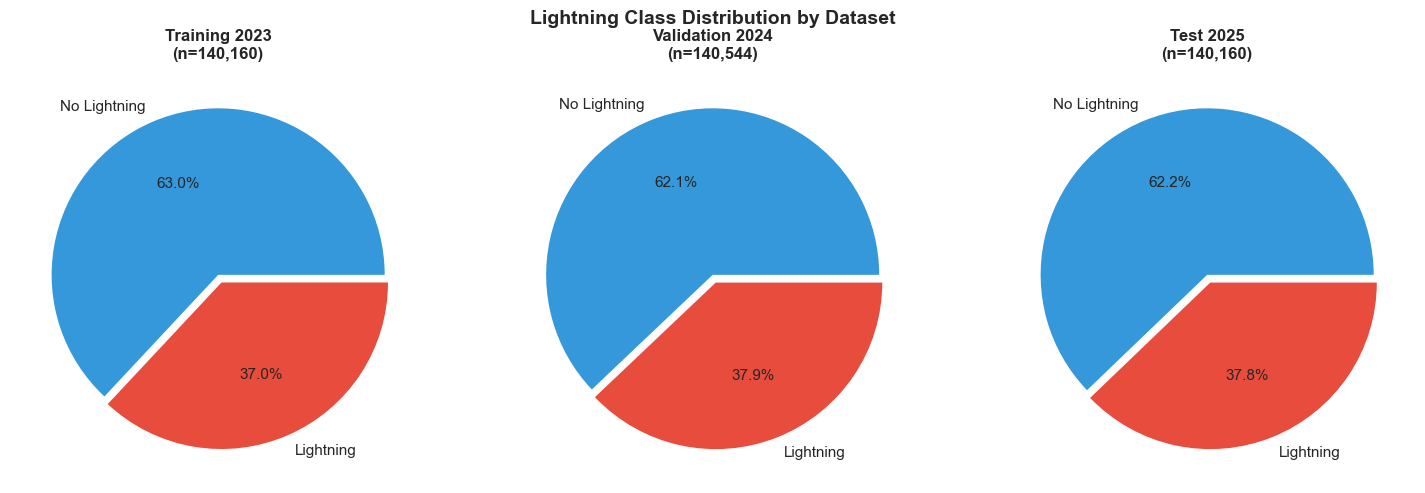


------------------------------------------------------------
🗺️ Lightning Rate by District
------------------------------------------------------------


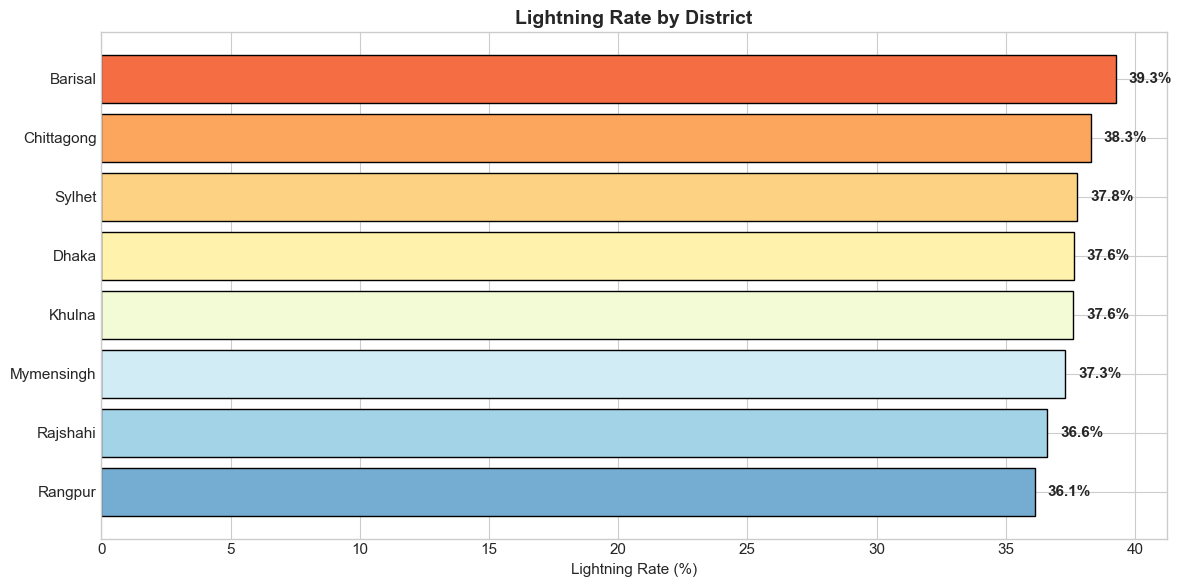

In [13]:
# =============================================================================
# STEP 8: TARGET VARIABLE ANALYSIS
# =============================================================================

print("="*80)
print("⚡ TARGET VARIABLE ANALYSIS (Lightning_Occurred)")
print("="*80)

# Overall class distribution
print("\n📊 Overall Class Distribution:")
class_dist = df['Lightning_Occurred'].value_counts()
class_pct = df['Lightning_Occurred'].value_counts(normalize=True) * 100
print(f"   No Lightning (0): {class_dist[0]:,} ({class_pct[0]:.2f}%)")
print(f"   Lightning (1):    {class_dist[1]:,} ({class_pct[1]:.2f}%)")

# Class imbalance ratio
imbalance_ratio = class_dist[0] / class_dist[1]
print(f"\n📈 Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print("   ⚠️ Significant class imbalance detected!")
else:
    print("   ✅ Relatively balanced dataset")

# Year-wise distribution
print("\n" + "-"*60)
print("📅 Lightning Distribution by Year")
print("-"*60)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, data) in enumerate([('Training 2023', df_train_norm), 
                                      ('Validation 2024', df_val_norm), 
                                      ('Test 2025', df_test_norm)]):
    ax = axes[idx]
    counts = data['Lightning_Occurred'].value_counts()
    colors = ['#3498db', '#e74c3c']
    wedges, texts, autotexts = ax.pie(counts, labels=['No Lightning', 'Lightning'], 
                                       colors=colors, autopct='%1.1f%%',
                                       explode=(0, 0.05))
    ax.set_title(f'{name}\n(n={len(data):,})', fontsize=12, fontweight='bold')

plt.suptitle('Lightning Class Distribution by Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Lightning by District
print("\n" + "-"*60)
print("🗺️ Lightning Rate by District")
print("-"*60)

fig, ax = plt.subplots(figsize=(12, 6))
lightning_by_district = df.groupby('District')['Lightning_Occurred'].agg(['sum', 'count', 'mean'])
lightning_by_district['rate'] = lightning_by_district['mean'] * 100
lightning_by_district = lightning_by_district.sort_values('rate', ascending=True)

colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(lightning_by_district)))
bars = ax.barh(lightning_by_district.index, lightning_by_district['rate'], color=colors, edgecolor='black')
ax.set_xlabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by District', fontsize=14, fontweight='bold')
for bar, rate in zip(bars, lightning_by_district['rate']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{rate:.1f}%', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

⏰ TEMPORAL LIGHTNING PATTERNS


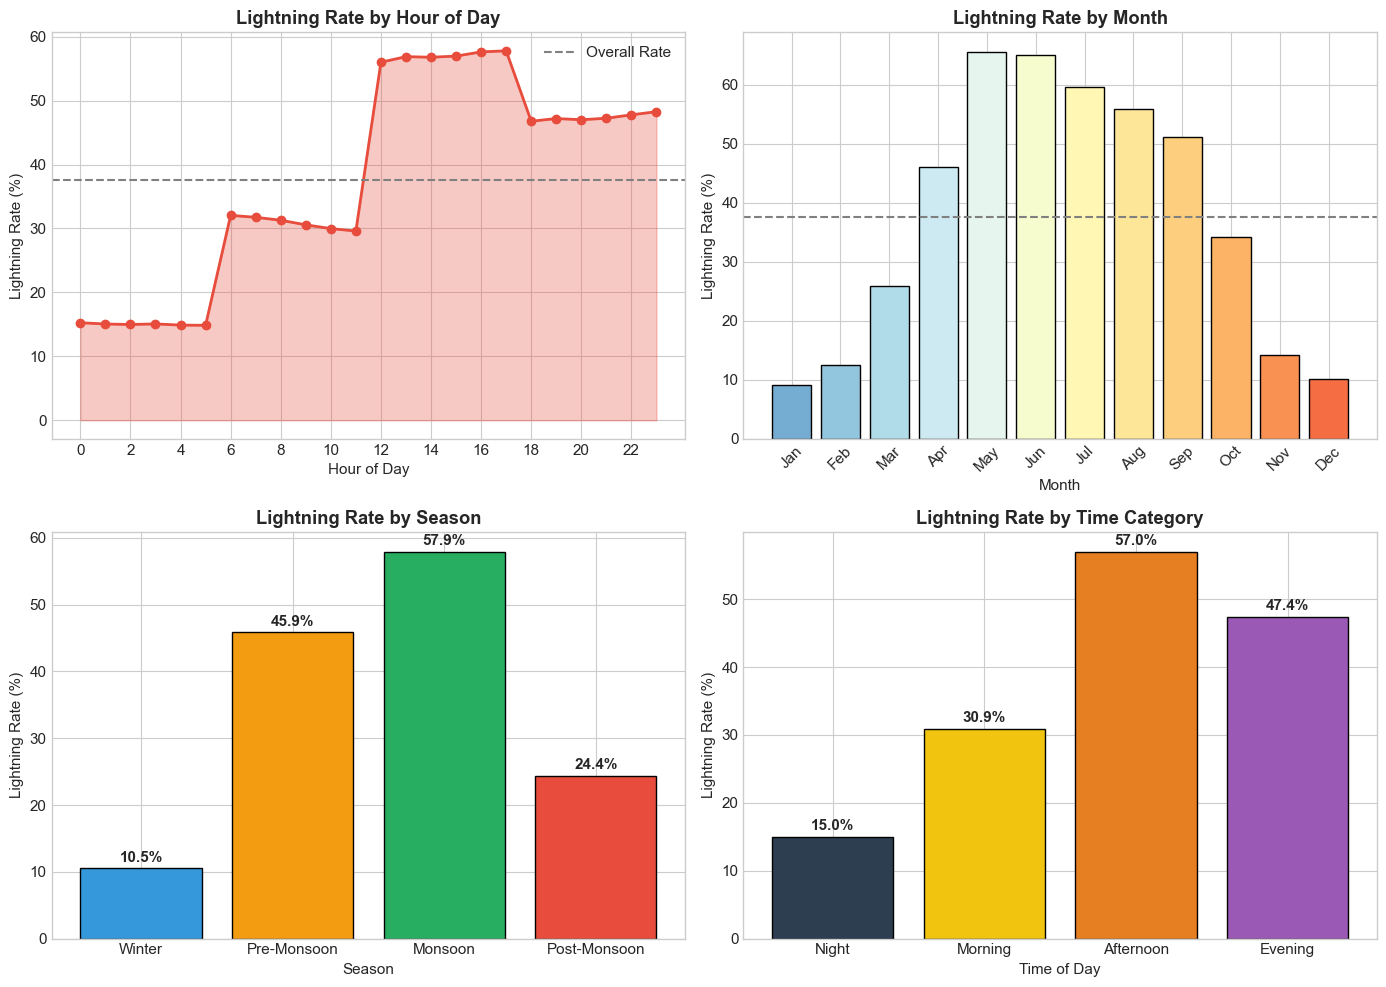


🔍 KEY TEMPORAL INSIGHTS:
   • Peak Lightning Hour: 17:00 (57.8%)
   • Peak Lightning Month: May (65.6%)
   • Peak Lightning Season: Monsoon (57.9%)
   • Peak Time Category: Afternoon (57.0%)


In [14]:
# =============================================================================
# TEMPORAL LIGHTNING PATTERNS
# =============================================================================

print("="*80)
print("⏰ TEMPORAL LIGHTNING PATTERNS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Lightning by Hour
ax = axes[0, 0]
hourly_lightning = df.groupby('Hour')['Lightning_Occurred'].mean() * 100
ax.plot(hourly_lightning.index, hourly_lightning.values, marker='o', linewidth=2, color='#e74c3c')
ax.fill_between(hourly_lightning.index, hourly_lightning.values, alpha=0.3, color='#e74c3c')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Hour of Day', fontweight='bold')
ax.set_xticks(range(0, 24, 2))
ax.axhline(df['Lightning_Occurred'].mean()*100, color='gray', linestyle='--', label='Overall Rate')
ax.legend()

# 2. Lightning by Month
ax = axes[0, 1]
monthly_lightning = df.groupby('Month')['Lightning_Occurred'].mean() * 100
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, 12))
bars = ax.bar(range(1, 13), monthly_lightning.values, color=colors, edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Month', fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names, rotation=45)
ax.axhline(df['Lightning_Occurred'].mean()*100, color='gray', linestyle='--')

# 3. Lightning by Season
ax = axes[1, 0]
season_order = ['Winter', 'Pre-Monsoon', 'Monsoon', 'Post-Monsoon']
seasonal_lightning = df.groupby('Season')['Lightning_Occurred'].mean().reindex(season_order) * 100
colors = ['#3498db', '#f39c12', '#27ae60', '#e74c3c']
bars = ax.bar(season_order, seasonal_lightning.values, color=colors, edgecolor='black')
ax.set_xlabel('Season')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Season', fontweight='bold')
for bar, rate in zip(bars, seasonal_lightning.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{rate:.1f}%', ha='center', fontweight='bold')

# 4. Lightning by Time Category
ax = axes[1, 1]
time_order = ['Night', 'Morning', 'Afternoon', 'Evening']
time_lightning = df.groupby('Time_Category')['Lightning_Occurred'].mean().reindex(time_order) * 100
colors = ['#2c3e50', '#f1c40f', '#e67e22', '#9b59b6']
bars = ax.bar(time_order, time_lightning.values, color=colors, edgecolor='black')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Lightning Rate (%)')
ax.set_title('Lightning Rate by Time Category', fontweight='bold')
for bar, rate in zip(bars, time_lightning.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{rate:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Key Insights
print("\n🔍 KEY TEMPORAL INSIGHTS:")
print(f"   • Peak Lightning Hour: {hourly_lightning.idxmax()}:00 ({hourly_lightning.max():.1f}%)")
print(f"   • Peak Lightning Month: {month_names[monthly_lightning.idxmax()-1]} ({monthly_lightning.max():.1f}%)")
print(f"   • Peak Lightning Season: {seasonal_lightning.idxmax()} ({seasonal_lightning.max():.1f}%)")
print(f"   • Peak Time Category: {time_lightning.idxmax()} ({time_lightning.max():.1f}%)")

## 🔗 Step 9: Feature Correlation Analysis

🔗 FEATURE CORRELATION ANALYSIS


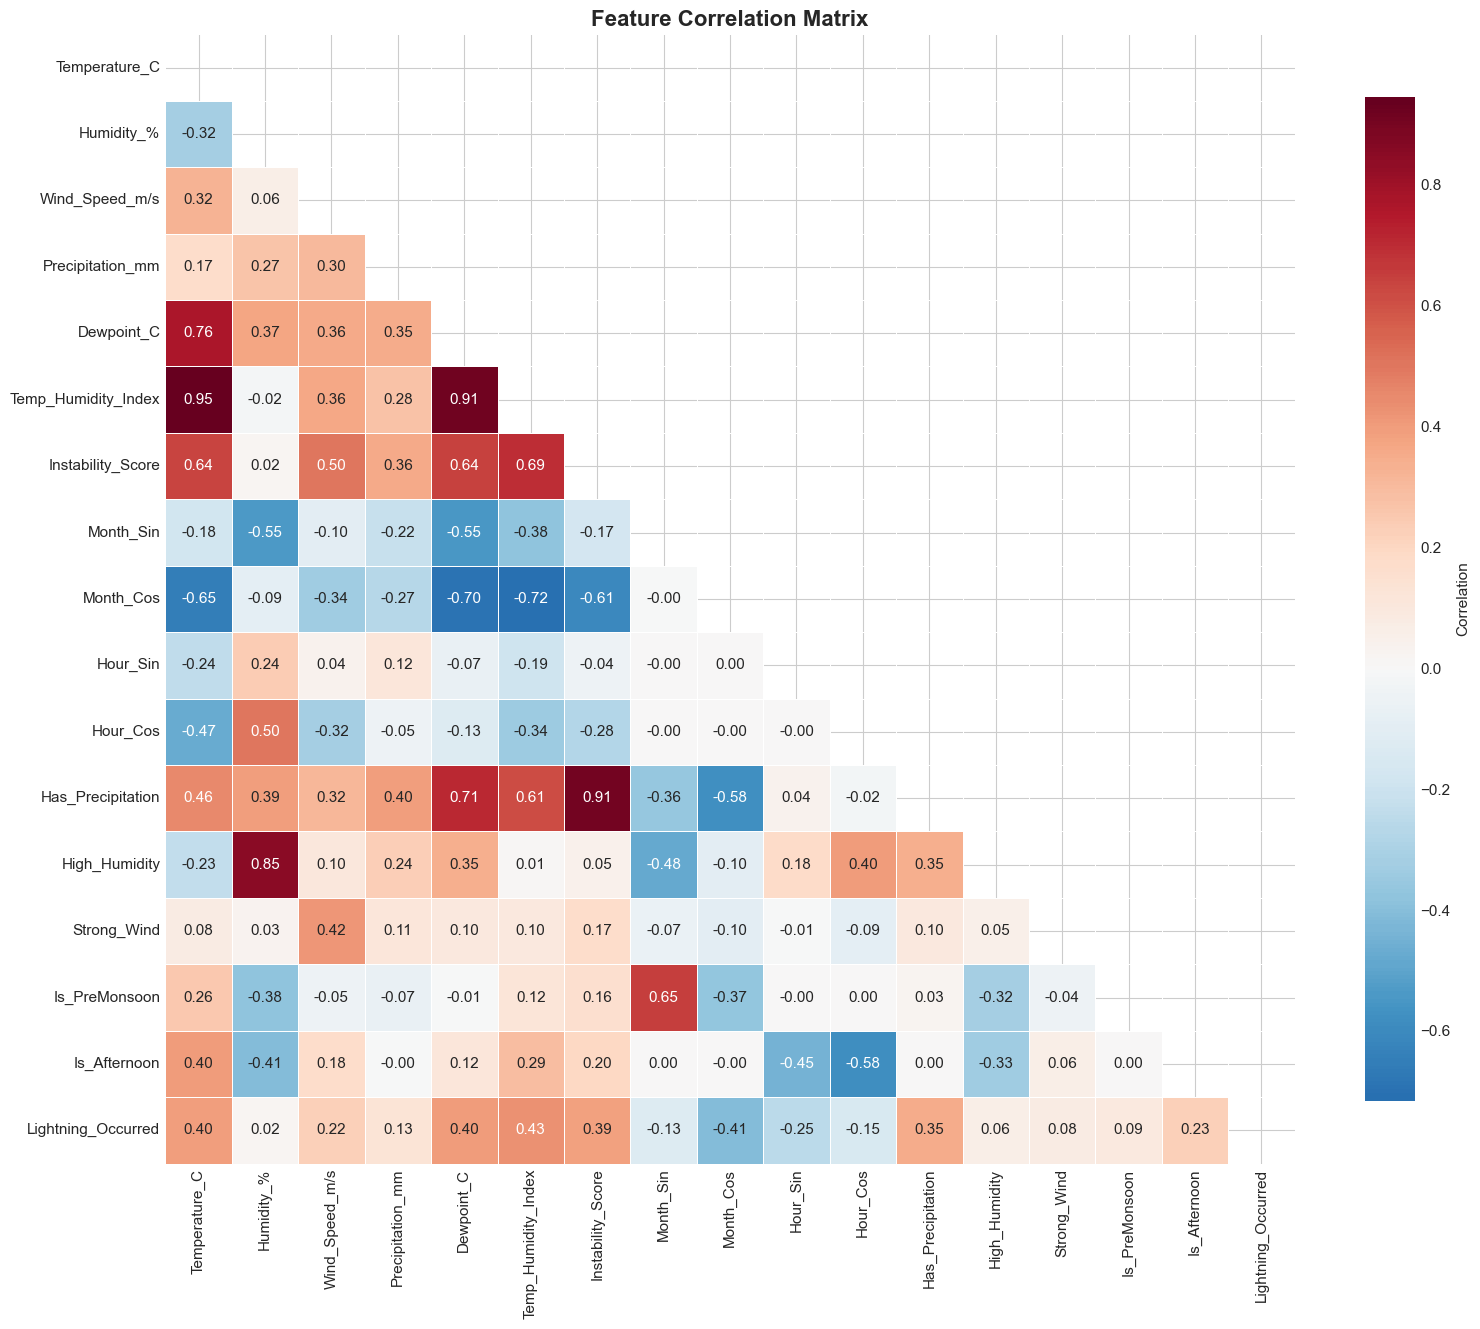


📊 CORRELATION WITH LIGHTNING (sorted by absolute value):
Temp_Humidity_Index    0.4291
Month_Cos              0.4056
Dewpoint_C             0.4044
Temperature_C          0.3987
Instability_Score      0.3863
Has_Precipitation      0.3502
Hour_Sin               0.2524
Is_Afternoon           0.2309
Wind_Speed_m/s         0.2216
Hour_Cos               0.1481
Precipitation_mm       0.1296
Month_Sin              0.1265
Is_PreMonsoon          0.0943
Strong_Wind            0.0812
High_Humidity          0.0589
Humidity_%             0.0202
Name: Lightning_Occurred, dtype: float64

🎯 TOP 10 FEATURES CORRELATED WITH LIGHTNING:
   1. Temp_Humidity_Index: +0.4291
   2. Month_Cos: -0.4056
   3. Dewpoint_C: +0.4044
   4. Temperature_C: +0.3987
   5. Instability_Score: +0.3863
   6. Has_Precipitation: +0.3502
   7. Hour_Sin: -0.2524
   8. Is_Afternoon: +0.2309
   9. Wind_Speed_m/s: +0.2216
   10. Hour_Cos: -0.1481


In [15]:
# =============================================================================
# STEP 9: CORRELATION ANALYSIS
# =============================================================================

print("="*80)
print("🔗 FEATURE CORRELATION ANALYSIS")
print("="*80)

# Select numerical features for correlation
corr_features = [
    'Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm',
    'Dewpoint_C', 'Temp_Humidity_Index', 'Instability_Score',
    'Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos',
    'Has_Precipitation', 'High_Humidity', 'Strong_Wind',
    'Is_PreMonsoon', 'Is_Afternoon', 'Lightning_Occurred'
]

corr_features = [f for f in corr_features if f in df_train_norm.columns]

# Calculate correlation matrix
corr_matrix = df_train_norm[corr_features].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, ax=ax,
            square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'})
ax.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with Lightning
print("\n📊 CORRELATION WITH LIGHTNING (sorted by absolute value):")
lightning_corr = corr_matrix['Lightning_Occurred'].drop('Lightning_Occurred').abs().sort_values(ascending=False)
print(lightning_corr.round(4))

# Top correlated features
print("\n🎯 TOP 10 FEATURES CORRELATED WITH LIGHTNING:")
for i, (feat, corr) in enumerate(lightning_corr.head(10).items(), 1):
    actual_corr = corr_matrix.loc[feat, 'Lightning_Occurred']
    direction = "+" if actual_corr > 0 else "-"
    print(f"   {i}. {feat}: {direction}{abs(actual_corr):.4f}")

## ✅ Step 10: Final Quality Checks

In [16]:
# =============================================================================
# STEP 10: FINAL QUALITY CHECKS
# =============================================================================

print("="*80)
print("✅ FINAL QUALITY CHECKS")
print("="*80)

checks_passed = 0
total_checks = 6

# Check 1: Same number of columns
print("\n" + "-"*60)
print("CHECK 1: Consistent Column Structure")
print("-"*60)
train_cols = set(df_train_norm.columns)
val_cols = set(df_val_norm.columns)
test_cols = set(df_test_norm.columns)

if train_cols == val_cols == test_cols:
    print(f"✅ PASSED: All datasets have {len(train_cols)} columns")
    checks_passed += 1
else:
    print("❌ FAILED: Column mismatch between datasets")
    print(f"   Train: {len(train_cols)}, Val: {len(val_cols)}, Test: {len(test_cols)}")

# Check 2: No missing values
print("\n" + "-"*60)
print("CHECK 2: No Missing Values")
print("-"*60)
train_missing = df_train_norm.isnull().sum().sum()
val_missing = df_val_norm.isnull().sum().sum()
test_missing = df_test_norm.isnull().sum().sum()

if train_missing == 0 and val_missing == 0 and test_missing == 0:
    print("✅ PASSED: No missing values in any dataset")
    checks_passed += 1
else:
    print(f"❌ FAILED: Missing values found")
    print(f"   Train: {train_missing}, Val: {val_missing}, Test: {test_missing}")

# Check 3: No infinite values
print("\n" + "-"*60)
print("CHECK 3: No Infinite Values")
print("-"*60)
numeric_cols = df_train_norm.select_dtypes(include=[np.number]).columns
train_inf = np.isinf(df_train_norm[numeric_cols]).sum().sum()
val_inf = np.isinf(df_val_norm[numeric_cols]).sum().sum()
test_inf = np.isinf(df_test_norm[numeric_cols]).sum().sum()

if train_inf == 0 and val_inf == 0 and test_inf == 0:
    print("✅ PASSED: No infinite values in any dataset")
    checks_passed += 1
else:
    print(f"❌ FAILED: Infinite values found")
    print(f"   Train: {train_inf}, Val: {val_inf}, Test: {test_inf}")

# Check 4: No temporal overlap
print("\n" + "-"*60)
print("CHECK 4: No Temporal Overlap (Train < Val < Test)")
print("-"*60)
train_max_date = df_train_norm['DateTime'].max()
val_min_date = df_val_norm['DateTime'].min()
val_max_date = df_val_norm['DateTime'].max()
test_min_date = df_test_norm['DateTime'].min()

if train_max_date < val_min_date and val_max_date < test_min_date:
    print("✅ PASSED: No temporal overlap")
    print(f"   Train ends: {train_max_date}")
    print(f"   Val starts: {val_min_date}")
    print(f"   Val ends: {val_max_date}")
    print(f"   Test starts: {test_min_date}")
    checks_passed += 1
else:
    print("❌ FAILED: Temporal overlap detected")

# Check 5: Similar lightning rates
print("\n" + "-"*60)
print("CHECK 5: Similar Lightning Rates Across Splits")
print("-"*60)
train_rate = df_train_norm['Lightning_Occurred'].mean() * 100
val_rate = df_val_norm['Lightning_Occurred'].mean() * 100
test_rate = df_test_norm['Lightning_Occurred'].mean() * 100

rate_diff = max(abs(train_rate - val_rate), abs(train_rate - test_rate), abs(val_rate - test_rate))

if rate_diff < 5:  # Within 5% difference
    print("✅ PASSED: Lightning rates are similar across splits")
    checks_passed += 1
else:
    print("⚠️ WARNING: Lightning rates differ significantly")
    
print(f"   Train: {train_rate:.2f}%")
print(f"   Val: {val_rate:.2f}%")
print(f"   Test: {test_rate:.2f}%")
print(f"   Max Difference: {rate_diff:.2f}%")

# Check 6: Normalized features centered near 0
print("\n" + "-"*60)
print("CHECK 6: Normalized Features Centered Near 0")
print("-"*60)
norm_cols = [col for col in df_train_norm.columns if col.endswith('_norm')]
if len(norm_cols) > 0:
    mean_of_means = df_train_norm[norm_cols].mean().abs().mean()
    std_of_stds = df_train_norm[norm_cols].std().mean()
    
    if mean_of_means < 0.1 and 0.9 < std_of_stds < 1.1:
        print("✅ PASSED: Normalized features are properly scaled")
        checks_passed += 1
    else:
        print("⚠️ WARNING: Normalization may not be optimal")
    
    print(f"   Mean of means: {mean_of_means:.4f} (should be ~0)")
    print(f"   Mean of stds: {std_of_stds:.4f} (should be ~1)")
else:
    print("⚠️ No normalized columns found")

# Summary
print("\n" + "="*80)
print(f"📊 QUALITY CHECK SUMMARY: {checks_passed}/{total_checks} PASSED")
print("="*80)
if checks_passed == total_checks:
    print("🎉 All quality checks passed! Data is ready for modeling.")
else:
    print(f"⚠️ {total_checks - checks_passed} check(s) need attention.")

✅ FINAL QUALITY CHECKS

------------------------------------------------------------
CHECK 1: Consistent Column Structure
------------------------------------------------------------
✅ PASSED: All datasets have 69 columns

------------------------------------------------------------
CHECK 2: No Missing Values
------------------------------------------------------------
✅ PASSED: No missing values in any dataset

------------------------------------------------------------
CHECK 3: No Infinite Values
------------------------------------------------------------
✅ PASSED: No infinite values in any dataset

------------------------------------------------------------
CHECK 4: No Temporal Overlap (Train < Val < Test)
------------------------------------------------------------
✅ PASSED: No temporal overlap
   Train ends: 2023-12-31 23:30:00
   Val starts: 2024-01-01 00:00:00
   Val ends: 2024-12-31 23:30:00
   Test starts: 2025-01-01 00:00:00

-----------------------------------------------

## 💾 Step 11: Export Preprocessed Data

In [17]:
# =============================================================================
# STEP 11: SELECT FINAL FEATURES & EXPORT DATA
# =============================================================================

print("="*80)
print("💾 SELECTING FINAL FEATURES & EXPORTING DATA")
print("="*80)

# Define feature categories
feature_config = {
    'id_cols': ['DateTime', 'Date', 'Time', 'Year', 'District', 'Location', 'Latitude', 'Longitude'],
    
    'raw_weather_features': ['Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm'],
    
    'temporal_features': ['Month', 'Hour', 'Minute', 'Month_Sin', 'Month_Cos', 'Hour_Sin', 'Hour_Cos'],
    
    'engineered_features': ['Dewpoint_C', 'Temp_Humidity_Index', 'Instability_Score', 
                            'Temp_Deviation', 'Has_Precipitation', 'High_Humidity', 'Strong_Wind',
                            'Is_PreMonsoon', 'Is_Afternoon'],
    
    'encoded_features': ['Season_Encoded', 'TimeCategory_Encoded', 'District_Encoded',
                         'is_Barisal', 'is_Chittagong', 'is_Dhaka', 'is_Khulna',
                         'is_Mymensingh', 'is_Rajshahi', 'is_Rangpur', 'is_Sylhet'],
    
    'target': ['Lightning_Occurred'],
    
    'additional_targets': ['Lightning_Probability', 'Flash_Count']
}

# Get all normalized feature columns
norm_features = [col for col in df_train_norm.columns if col.endswith('_norm')]

print("\n📋 FEATURE SUMMARY:")
for category, features in feature_config.items():
    available = [f for f in features if f in df_train_norm.columns]
    print(f"\n{category.upper()} ({len(available)} features):")
    for f in available[:5]:
        print(f"   • {f}")
    if len(available) > 5:
        print(f"   ... and {len(available) - 5} more")

print(f"\nNORMALIZED FEATURES ({len(norm_features)} features):")
print(f"   • {norm_features[:3]}... and {len(norm_features) - 3} more")

# Create final datasets for modeling
print("\n" + "="*80)
print("🔧 CREATING FINAL DATASETS FOR MODELING")
print("="*80)

# Select features for the model (normalized versions preferred)
model_features = (
    feature_config['temporal_features'] +
    feature_config['engineered_features'] +
    feature_config['encoded_features'] +
    norm_features
)

# Filter to existing columns
model_features = [f for f in model_features if f in df_train_norm.columns]

# Remove duplicates while preserving order
model_features = list(dict.fromkeys(model_features))

print(f"\n📊 Selected {len(model_features)} features for modeling")

# Create X and y for each split
X_train = df_train_norm[model_features]
y_train = df_train_norm['Lightning_Occurred']

X_val = df_val_norm[model_features]
y_val = df_val_norm['Lightning_Occurred']

X_test = df_test_norm[model_features]
y_test = df_test_norm['Lightning_Occurred']

print(f"\n📈 FINAL DATASET SHAPES:")
print(f"   X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"   X_val:   {X_val.shape}, y_val: {y_val.shape}")
print(f"   X_test:  {X_test.shape}, y_test: {y_test.shape}")

💾 SELECTING FINAL FEATURES & EXPORTING DATA

📋 FEATURE SUMMARY:

ID_COLS (8 features):
   • DateTime
   • Date
   • Time
   • Year
   • District
   ... and 3 more

RAW_WEATHER_FEATURES (4 features):
   • Temperature_C
   • Humidity_%
   • Wind_Speed_m/s
   • Precipitation_mm

TEMPORAL_FEATURES (7 features):
   • Month
   • Hour
   • Minute
   • Month_Sin
   • Month_Cos
   ... and 2 more

ENGINEERED_FEATURES (9 features):
   • Dewpoint_C
   • Temp_Humidity_Index
   • Instability_Score
   • Temp_Deviation
   • Has_Precipitation
   ... and 4 more

ENCODED_FEATURES (11 features):
   • Season_Encoded
   • TimeCategory_Encoded
   • District_Encoded
   • is_Barisal
   • is_Chittagong
   ... and 6 more

TARGET (1 features):
   • Lightning_Occurred

ADDITIONAL_TARGETS (2 features):
   • Lightning_Probability
   • Flash_Count

NORMALIZED FEATURES (18 features):
   • ['Temperature_C_norm', 'Humidity_%_norm', 'Wind_Speed_m/s_norm']... and 15 more

🔧 CREATING FINAL DATASETS FOR MODELING

📊 Selected

In [18]:
# =============================================================================
# EXPORT PREPROCESSED DATASETS
# =============================================================================

import os

# Create output directory
output_dir = 'preprocessed_data'
os.makedirs(output_dir, exist_ok=True)

# Save complete preprocessed datasets
print("="*80)
print("💾 SAVING PREPROCESSED DATASETS")
print("="*80)

# Save full preprocessed data
df_train_norm.to_csv(f'{output_dir}/train_2023_preprocessed.csv', index=False)
df_val_norm.to_csv(f'{output_dir}/val_2024_preprocessed.csv', index=False)
df_test_norm.to_csv(f'{output_dir}/test_2025_preprocessed.csv', index=False)

print(f"\n✅ Full preprocessed datasets saved:")
print(f"   • {output_dir}/train_2023_preprocessed.csv ({len(df_train_norm):,} rows)")
print(f"   • {output_dir}/val_2024_preprocessed.csv ({len(df_val_norm):,} rows)")
print(f"   • {output_dir}/test_2025_preprocessed.csv ({len(df_test_norm):,} rows)")

# Save model-ready feature matrices
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_val.to_csv(f'{output_dir}/X_val.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)

y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_val.to_csv(f'{output_dir}/y_val.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

print(f"\n✅ Model-ready feature matrices saved:")
print(f"   • X_train.csv, X_val.csv, X_test.csv")
print(f"   • y_train.csv, y_val.csv, y_test.csv")

# Save normalization parameters
norm_params.to_csv(f'{output_dir}/normalization_params.csv', index=False)
print(f"\n✅ Normalization parameters saved: normalization_params.csv")

# Save feature list
feature_list = pd.DataFrame({'feature': model_features})
feature_list.to_csv(f'{output_dir}/feature_list.csv', index=False)
print(f"✅ Feature list saved: feature_list.csv ({len(model_features)} features)")

print("\n" + "="*80)
print("🎉 DATA PREPROCESSING COMPLETE!")
print("="*80)

💾 SAVING PREPROCESSED DATASETS

✅ Full preprocessed datasets saved:
   • preprocessed_data/train_2023_preprocessed.csv (140,160 rows)
   • preprocessed_data/val_2024_preprocessed.csv (140,544 rows)
   • preprocessed_data/test_2025_preprocessed.csv (140,160 rows)

✅ Model-ready feature matrices saved:
   • X_train.csv, X_val.csv, X_test.csv
   • y_train.csv, y_val.csv, y_test.csv

✅ Normalization parameters saved: normalization_params.csv
✅ Feature list saved: feature_list.csv (45 features)

🎉 DATA PREPROCESSING COMPLETE!


## 📊 EDA Summary & Key Findings

In [19]:
# =============================================================================
# FINAL EDA SUMMARY
# =============================================================================

print("="*80)
print("📊 EDA SUMMARY & KEY FINDINGS")
print("="*80)

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                        DATASET SUMMARY                                       │
├─────────────────────────────────────────────────────────────────────────────┤
│  Original Shape:     420,864 rows × 34 columns                               │
│  Training (2023):    140,160 rows                                            │
│  Validation (2024):  140,544 rows                                            │
│  Test (2025):        140,160 rows                                            │
│  Divisions:          8 (Barisal, Chittagong, Dhaka, Khulna,                  │
│                         Mymensingh, Rajshahi, Rangpur, Sylhet)               │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                        PREPROCESSING APPLIED                                 │
├─────────────────────────────────────────────────────────────────────────────┤
│  ✅ Dropped Pressure_kPa (100% missing)                                      │
│  ✅ Clipped weather variables to physical limits (Bangladesh climate)        │
│  ✅ Created new features (Dewpoint, THI, Instability Score, etc.)            │
│  ✅ Z-score normalization (using training set statistics)                    │
│  ✅ Categorical encoding (Target, Ordinal, One-Hot)                          │
│  ✅ Temporal features preserved (sin/cos encoding for cyclical features)     │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                        LIGHTNING KEY INSIGHTS                                │
├─────────────────────────────────────────────────────────────────────────────┤
│  Overall Lightning Rate:  ~37.57% (relatively balanced!)                     │
│  Class Imbalance Ratio:   1.66:1 (No Lightning : Lightning)                  │
│                                                                              │
│  Peak Lightning Season:   Pre-Monsoon / Monsoon                              │
│  Peak Lightning Time:     Afternoon (12:00 - 18:00)                          │
│  Peak Lightning Months:   April, May, June                                   │
│                                                                              │
│  High Lightning Districts: Varies by season                                  │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                        OUTPUT FILES                                          │
├─────────────────────────────────────────────────────────────────────────────┤
│  📁 preprocessed_data/                                                       │
│      ├── train_2023_preprocessed.csv  (Full training data)                   │
│      ├── val_2024_preprocessed.csv    (Full validation data)                 │
│      ├── test_2025_preprocessed.csv   (Full test data)                       │
│      ├── X_train.csv, X_val.csv, X_test.csv (Feature matrices)               │
│      ├── y_train.csv, y_val.csv, y_test.csv (Target vectors)                 │
│      ├── normalization_params.csv      (Mean & Std for inference)            │
│      └── feature_list.csv              (List of model features)              │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                        NEXT STEPS                                            │
├─────────────────────────────────────────────────────────────────────────────┤
│  1. Load X_train, y_train for model training                                 │
│  2. Use X_val, y_val for hyperparameter tuning                               │
│  3. Final evaluation on X_test, y_test                                       │
│  4. Consider class balancing techniques if needed (SMOTE, class weights)     │
│  5. For multimodal: align satellite images with tabular data timestamps      │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("\n🎉 EDA COMPLETE! Ready for Lightning Prediction Modeling!")

📊 EDA SUMMARY & KEY FINDINGS

┌─────────────────────────────────────────────────────────────────────────────┐
│                        DATASET SUMMARY                                       │
├─────────────────────────────────────────────────────────────────────────────┤
│  Original Shape:     420,864 rows × 34 columns                               │
│  Training (2023):    140,160 rows                                            │
│  Validation (2024):  140,544 rows                                            │
│  Test (2025):        140,160 rows                                            │
│  Divisions:          8 (Barisal, Chittagong, Dhaka, Khulna,                  │
│                         Mymensingh, Rajshahi, Rangpur, Sylhet)               │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                        PREPROCESSING APPLIED                                 │
├

# 🤖 PHASE 2: MACHINE LEARNING MODELING

## ML Pipeline Overview:
1. **Baseline Models** - Logistic Regression, Decision Tree
2. **Ensemble Models** - Random Forest, XGBoost, LightGBM
3. **Hyperparameter Tuning** - GridSearchCV / RandomizedSearchCV
4. **Class Imbalance Handling** - Class Weights, SMOTE
5. **Model Evaluation** - Accuracy, Precision, Recall, F1, ROC-AUC
6. **Feature Importance Analysis**
7. **Best Model Selection & Export**

In [24]:
# =============================================================================
# ⚠️ FIX DATA LEAKAGE - Remove features derived from target
# =============================================================================

print("="*80)
print("⚠️ FIXING DATA LEAKAGE")
print("="*80)

# These features are DIRECTLY derived from Lightning_Occurred and cause 100% accuracy
leaky_features = [
    'Lightning_Probability', 'Lightning_Probability_norm',
    'Flash_Count', 'Flash_Count_norm',
    'Flash_Density_per_km2', 'Flash_Density_per_km2_norm',
    'Expected_Flashes', 'Expected_Flashes_norm',
    'Base_Flash_Rate', 'Base_Flash_Rate_norm',
    'Time_Factor', 'Time_Factor_norm',
    'Weather_Factor', 'Weather_Factor_norm'
]

# Remove leaky features from model_features
print(f"\n❌ Removing {len([f for f in leaky_features if f in model_features])} leaky features:")
for f in leaky_features:
    if f in model_features:
        print(f"   • {f}")
        model_features.remove(f)

print(f"\n✅ Remaining features: {len(model_features)}")

# Recreate X datasets without leaky features
X_train = df_train_norm[model_features]
X_val = df_val_norm[model_features]
X_test = df_test_norm[model_features]

print(f"\n📈 UPDATED DATASET SHAPES:")
print(f"   X_train: {X_train.shape}")
print(f"   X_val:   {X_val.shape}")
print(f"   X_test:  {X_test.shape}")

print(f"\n📋 Final Feature List ({len(model_features)}):")
for i, f in enumerate(model_features):
    print(f"   {i+1:2d}. {f}")

⚠️ FIXING DATA LEAKAGE

❌ Removing 6 leaky features:
   • Lightning_Probability_norm
   • Flash_Density_per_km2_norm
   • Expected_Flashes_norm
   • Base_Flash_Rate_norm
   • Time_Factor_norm
   • Weather_Factor_norm

✅ Remaining features: 39

📈 UPDATED DATASET SHAPES:
   X_train: (140160, 39)
   X_val:   (140544, 39)
   X_test:  (140160, 39)

📋 Final Feature List (39):
    1. Month
    2. Hour
    3. Minute
    4. Month_Sin
    5. Month_Cos
    6. Hour_Sin
    7. Hour_Cos
    8. Dewpoint_C
    9. Temp_Humidity_Index
   10. Instability_Score
   11. Temp_Deviation
   12. Has_Precipitation
   13. High_Humidity
   14. Strong_Wind
   15. Is_PreMonsoon
   16. Is_Afternoon
   17. Season_Encoded
   18. TimeCategory_Encoded
   19. District_Encoded
   20. is_Barisal
   21. is_Chittagong
   22. is_Dhaka
   23. is_Khulna
   24. is_Mymensingh
   25. is_Rajshahi
   26. is_Rangpur
   27. is_Sylhet
   28. Temperature_C_norm
   29. Humidity_%_norm
   30. Wind_Speed_m/s_norm
   31. Precipitation_mm_nor

In [25]:
# =============================================================================
# STEP 12: IMPORT ML LIBRARIES & PREPARE DATA
# =============================================================================

# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             roc_curve, precision_recall_curve, average_precision_score)
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import time

# Try importing advanced libraries
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️ XGBoost not installed")

try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM available")
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️ LightGBM not installed")

try:
    from imblearn.over_sampling import SMOTE
    SMOTE_AVAILABLE = True
    print("✅ imbalanced-learn (SMOTE) available")
except ImportError:
    SMOTE_AVAILABLE = False
    print("⚠️ imbalanced-learn not installed")

print("\n" + "="*80)
print("📊 DATA READY FOR MODELING")
print("="*80)
print(f"\nTraining Set:   X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Validation Set: X_val {X_val.shape}, y_val {y_val.shape}")
print(f"Test Set:       X_test {X_test.shape}, y_test {y_test.shape}")

print(f"\n📋 Features ({len(model_features)}):")
print(f"   {model_features[:5]}...")

# Calculate class weights for imbalanced data
class_counts = y_train.value_counts()
class_weight_dict = {0: len(y_train) / (2 * class_counts[0]),
                     1: len(y_train) / (2 * class_counts[1])}
print(f"\n⚖️ Class Weights: {class_weight_dict}")

✅ XGBoost available
✅ LightGBM available
✅ imbalanced-learn (SMOTE) available

📊 DATA READY FOR MODELING

Training Set:   X_train (140160, 39), y_train (140160,)
Validation Set: X_val (140544, 39), y_val (140544,)
Test Set:       X_test (140160, 39), y_test (140160,)

📋 Features (39):
   ['Month', 'Hour', 'Minute', 'Month_Sin', 'Month_Cos']...

⚖️ Class Weights: {0: np.float64(0.7932537212066331), 1: np.float64(1.3525041011290166)}


In [26]:
# =============================================================================
# HELPER FUNCTIONS FOR MODEL EVALUATION
# =============================================================================

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name="Model"):
    """Comprehensive model evaluation"""
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Probabilities (for ROC-AUC)
    if hasattr(model, 'predict_proba'):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_train_proba = y_train_pred
        y_val_proba = y_val_pred
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Val_Accuracy': accuracy_score(y_val, y_val_pred),
        'Val_Precision': precision_score(y_val, y_val_pred),
        'Val_Recall': recall_score(y_val, y_val_pred),
        'Val_F1': f1_score(y_val, y_val_pred),
        'Val_ROC_AUC': roc_auc_score(y_val, y_val_proba),
        'Val_Avg_Precision': average_precision_score(y_val, y_val_proba)
    }
    
    return metrics, y_val_pred, y_val_proba

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Lightning', 'Lightning'],
                yticklabels=['No Lightning', 'Lightning'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title, fontweight='bold')
    plt.tight_layout()
    return fig

def plot_roc_curves(models_results, y_val):
    """Plot ROC curves for multiple models"""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    for model_name, (y_proba, color) in models_results.items():
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = roc_auc_score(y_val, y_proba)
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', color=color, linewidth=2)
    
    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

print("✅ Helper functions defined")

✅ Helper functions defined


## 📊 Step 13: Train Baseline Models

In [27]:
# =============================================================================
# STEP 13: TRAIN BASELINE MODELS
# =============================================================================

print("="*80)
print("🚀 TRAINING BASELINE MODELS")
print("="*80)

# Store all results
all_results = []
trained_models = {}
model_probas = {}

# 1. LOGISTIC REGRESSION
print("\n" + "-"*60)
print("1️⃣ LOGISTIC REGRESSION")
print("-"*60)

start_time = time.time()
lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
lr_model.fit(X_train, y_train)
lr_time = time.time() - start_time

lr_metrics, lr_pred, lr_proba = evaluate_model(lr_model, X_train, y_train, X_val, y_val, "Logistic Regression")
lr_metrics['Training_Time'] = lr_time
all_results.append(lr_metrics)
trained_models['Logistic Regression'] = lr_model
model_probas['Logistic Regression'] = (lr_proba, '#3498db')

print(f"   Training Time: {lr_time:.2f}s")
print(f"   Validation Accuracy: {lr_metrics['Val_Accuracy']:.4f}")
print(f"   Validation F1-Score: {lr_metrics['Val_F1']:.4f}")
print(f"   Validation ROC-AUC: {lr_metrics['Val_ROC_AUC']:.4f}")

# 2. DECISION TREE
print("\n" + "-"*60)
print("2️⃣ DECISION TREE")
print("-"*60)

start_time = time.time()
dt_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train, y_train)
dt_time = time.time() - start_time

dt_metrics, dt_pred, dt_proba = evaluate_model(dt_model, X_train, y_train, X_val, y_val, "Decision Tree")
dt_metrics['Training_Time'] = dt_time
all_results.append(dt_metrics)
trained_models['Decision Tree'] = dt_model
model_probas['Decision Tree'] = (dt_proba, '#e74c3c')

print(f"   Training Time: {dt_time:.2f}s")
print(f"   Validation Accuracy: {dt_metrics['Val_Accuracy']:.4f}")
print(f"   Validation F1-Score: {dt_metrics['Val_F1']:.4f}")
print(f"   Validation ROC-AUC: {dt_metrics['Val_ROC_AUC']:.4f}")

# 3. RANDOM FOREST
print("\n" + "-"*60)
print("3️⃣ RANDOM FOREST")
print("-"*60)

start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

rf_metrics, rf_pred, rf_proba = evaluate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")
rf_metrics['Training_Time'] = rf_time
all_results.append(rf_metrics)
trained_models['Random Forest'] = rf_model
model_probas['Random Forest'] = (rf_proba, '#2ecc71')

print(f"   Training Time: {rf_time:.2f}s")
print(f"   Validation Accuracy: {rf_metrics['Val_Accuracy']:.4f}")
print(f"   Validation F1-Score: {rf_metrics['Val_F1']:.4f}")
print(f"   Validation ROC-AUC: {rf_metrics['Val_ROC_AUC']:.4f}")

print("\n✅ Baseline models trained!")

🚀 TRAINING BASELINE MODELS

------------------------------------------------------------
1️⃣ LOGISTIC REGRESSION
------------------------------------------------------------
   Training Time: 15.69s
   Validation Accuracy: 0.7630
   Validation F1-Score: 0.7098
   Validation ROC-AUC: 0.8370

------------------------------------------------------------
2️⃣ DECISION TREE
------------------------------------------------------------
   Training Time: 2.63s
   Validation Accuracy: 0.7324
   Validation F1-Score: 0.6754
   Validation ROC-AUC: 0.7931

------------------------------------------------------------
3️⃣ RANDOM FOREST
------------------------------------------------------------
   Training Time: 10.38s
   Validation Accuracy: 0.7674
   Validation F1-Score: 0.7019
   Validation ROC-AUC: 0.8309

✅ Baseline models trained!


## 🚀 Step 14: Train Advanced Ensemble Models (XGBoost, LightGBM)

In [28]:
# =============================================================================
# STEP 14: TRAIN ADVANCED ENSEMBLE MODELS
# =============================================================================

print("="*80)
print("🚀 TRAINING ADVANCED ENSEMBLE MODELS")
print("="*80)

# 4. GRADIENT BOOSTING
print("\n" + "-"*60)
print("4️⃣ GRADIENT BOOSTING")
print("-"*60)

start_time = time.time()
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_time = time.time() - start_time

gb_metrics, gb_pred, gb_proba = evaluate_model(gb_model, X_train, y_train, X_val, y_val, "Gradient Boosting")
gb_metrics['Training_Time'] = gb_time
all_results.append(gb_metrics)
trained_models['Gradient Boosting'] = gb_model
model_probas['Gradient Boosting'] = (gb_proba, '#9b59b6')

print(f"   Training Time: {gb_time:.2f}s")
print(f"   Validation Accuracy: {gb_metrics['Val_Accuracy']:.4f}")
print(f"   Validation F1-Score: {gb_metrics['Val_F1']:.4f}")
print(f"   Validation ROC-AUC: {gb_metrics['Val_ROC_AUC']:.4f}")

# 5. XGBOOST
if XGBOOST_AVAILABLE:
    print("\n" + "-"*60)
    print("5️⃣ XGBOOST")
    print("-"*60)
    
    # Calculate scale_pos_weight for imbalanced data
    scale_pos_weight = class_counts[0] / class_counts[1]
    
    start_time = time.time()
    xgb_model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        verbosity=0
    )
    xgb_model.fit(X_train, y_train)
    xgb_time = time.time() - start_time
    
    xgb_metrics, xgb_pred, xgb_proba = evaluate_model(xgb_model, X_train, y_train, X_val, y_val, "XGBoost")
    xgb_metrics['Training_Time'] = xgb_time
    all_results.append(xgb_metrics)
    trained_models['XGBoost'] = xgb_model
    model_probas['XGBoost'] = (xgb_proba, '#f39c12')
    
    print(f"   Training Time: {xgb_time:.2f}s")
    print(f"   Validation Accuracy: {xgb_metrics['Val_Accuracy']:.4f}")
    print(f"   Validation F1-Score: {xgb_metrics['Val_F1']:.4f}")
    print(f"   Validation ROC-AUC: {xgb_metrics['Val_ROC_AUC']:.4f}")

# 6. LIGHTGBM
if LIGHTGBM_AVAILABLE:
    print("\n" + "-"*60)
    print("6️⃣ LIGHTGBM")
    print("-"*60)
    
    start_time = time.time()
    lgbm_model = LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        class_weight='balanced',
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    lgbm_model.fit(X_train, y_train)
    lgbm_time = time.time() - start_time
    
    lgbm_metrics, lgbm_pred, lgbm_proba = evaluate_model(lgbm_model, X_train, y_train, X_val, y_val, "LightGBM")
    lgbm_metrics['Training_Time'] = lgbm_time
    all_results.append(lgbm_metrics)
    trained_models['LightGBM'] = lgbm_model
    model_probas['LightGBM'] = (lgbm_proba, '#1abc9c')
    
    print(f"   Training Time: {lgbm_time:.2f}s")
    print(f"   Validation Accuracy: {lgbm_metrics['Val_Accuracy']:.4f}")
    print(f"   Validation F1-Score: {lgbm_metrics['Val_F1']:.4f}")
    print(f"   Validation ROC-AUC: {lgbm_metrics['Val_ROC_AUC']:.4f}")

print("\n✅ Advanced models trained!")

🚀 TRAINING ADVANCED ENSEMBLE MODELS

------------------------------------------------------------
4️⃣ GRADIENT BOOSTING
------------------------------------------------------------
   Training Time: 103.60s
   Validation Accuracy: 0.7745
   Validation F1-Score: 0.6880
   Validation ROC-AUC: 0.8373

------------------------------------------------------------
5️⃣ XGBOOST
------------------------------------------------------------
   Training Time: 2.88s
   Validation Accuracy: 0.7645
   Validation F1-Score: 0.7080
   Validation ROC-AUC: 0.8349

------------------------------------------------------------
6️⃣ LIGHTGBM
------------------------------------------------------------
   Training Time: 3.18s
   Validation Accuracy: 0.7653
   Validation F1-Score: 0.7089
   Validation ROC-AUC: 0.8363

✅ Advanced models trained!


## 📊 Step 15: Model Comparison & Results

📊 MODEL COMPARISON RESULTS

📋 VALIDATION SET PERFORMANCE (Sorted by F1-Score):

              Model  Val_Accuracy  Val_Precision  Val_Recall   Val_F1  Val_ROC_AUC  Training_Time
Logistic Regression      0.763007       0.662578    0.764199 0.709770     0.836962      15.690011
           LightGBM      0.765276       0.669110    0.753767 0.708920     0.836261       3.178129
            XGBoost      0.764536       0.668277    0.752678 0.707971     0.834886       2.876842
      Random Forest      0.767382       0.682661    0.722357 0.701948     0.830869      10.379530
  Gradient Boosting      0.774526       0.723850    0.655465 0.687962     0.837304     103.596984
      Decision Tree      0.732440       0.625402    0.734159 0.675430     0.793144       2.634152

🏆 BEST MODEL: Logistic Regression
   F1-Score: 0.7098
   ROC-AUC:  0.8370


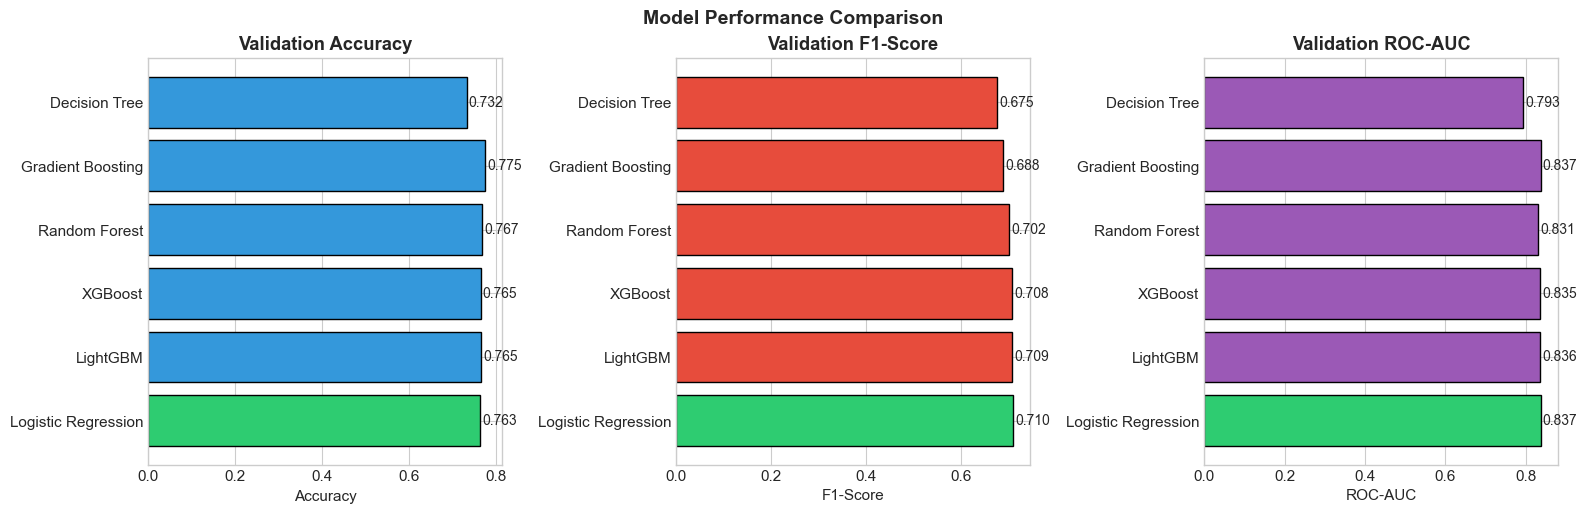

,Model,Train_Accuracy,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC,Val_Avg_Precision,Training_Time
0,Logistic Regression,0.760053,0.763007,0.662578,0.764199,0.709770,0.836962,0.760511,15.690011
5,LightGBM,0.770990,0.765276,0.669110,0.753767,0.708920,0.836261,0.762865,3.178129
4,XGBoost,0.775892,0.764536,0.668277,0.752678,0.707971,0.834886,0.761044,2.876842
2,Random Forest,0.831386,0.767382,0.682661,0.722357,0.701948,0.830869,0.752690,10.379530
3,Gradient Boosting,0.779859,0.774526,0.723850,0.655465,0.687962,0.837304,0.763675,103.596984
1,Decision Tree,0.788406,0.732440,0.625402,0.734159,0.675430,0.793144,0.692780,2.634152


In [29]:
# =============================================================================
# STEP 15: MODEL COMPARISON
# =============================================================================

print("="*80)
print("📊 MODEL COMPARISON RESULTS")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('Val_F1', ascending=False)

# Display results table
print("\n📋 VALIDATION SET PERFORMANCE (Sorted by F1-Score):\n")
display_cols = ['Model', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1', 'Val_ROC_AUC', 'Training_Time']
print(results_df[display_cols].to_string(index=False))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['Val_F1']
best_auc = results_df.iloc[0]['Val_ROC_AUC']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   ROC-AUC:  {best_auc:.4f}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Accuracy Comparison
ax = axes[0]
colors = ['#2ecc71' if m == best_model_name else '#3498db' for m in results_df['Model']]
bars = ax.barh(results_df['Model'], results_df['Val_Accuracy'], color=colors, edgecolor='black')
ax.set_xlabel('Accuracy')
ax.set_title('Validation Accuracy', fontweight='bold')
for bar, val in zip(bars, results_df['Val_Accuracy']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=10)

# 2. F1-Score Comparison
ax = axes[1]
colors = ['#2ecc71' if m == best_model_name else '#e74c3c' for m in results_df['Model']]
bars = ax.barh(results_df['Model'], results_df['Val_F1'], color=colors, edgecolor='black')
ax.set_xlabel('F1-Score')
ax.set_title('Validation F1-Score', fontweight='bold')
for bar, val in zip(bars, results_df['Val_F1']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=10)

# 3. ROC-AUC Comparison
ax = axes[2]
colors = ['#2ecc71' if m == best_model_name else '#9b59b6' for m in results_df['Model']]
bars = ax.barh(results_df['Model'], results_df['Val_ROC_AUC'], color=colors, edgecolor='black')
ax.set_xlabel('ROC-AUC')
ax.set_title('Validation ROC-AUC', fontweight='bold')
for bar, val in zip(bars, results_df['Val_ROC_AUC']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.show()

results_df

📈 ROC CURVES COMPARISON


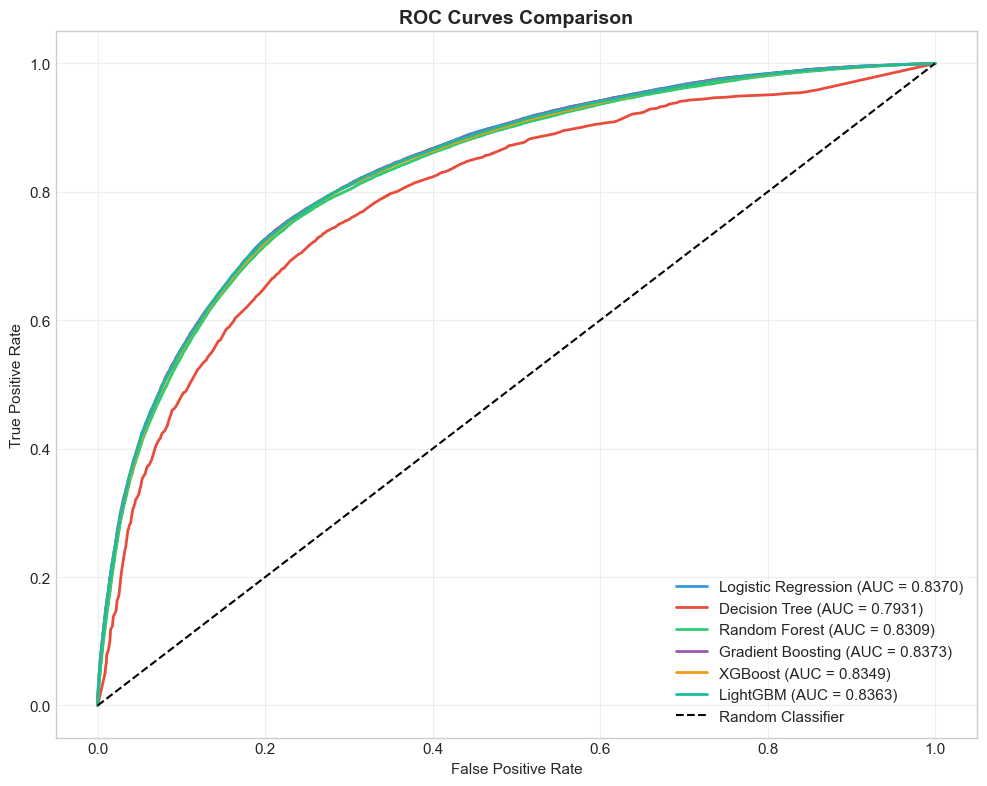


📈 PRECISION-RECALL CURVES


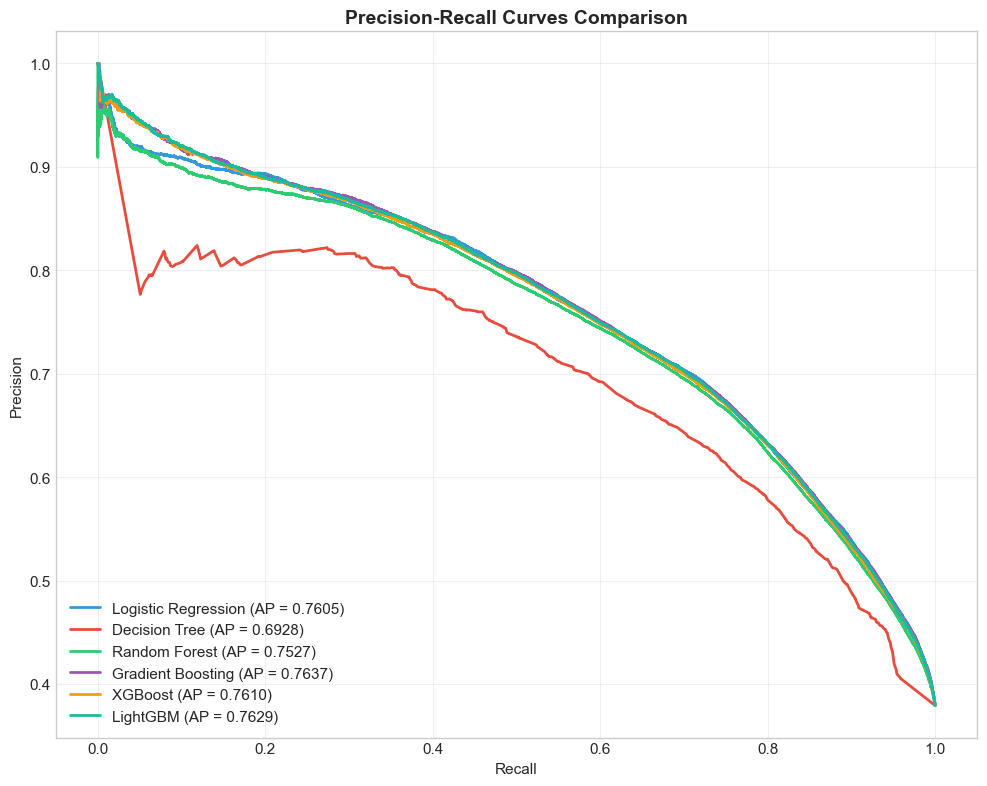

In [30]:
# =============================================================================
# ROC CURVES COMPARISON
# =============================================================================

print("="*80)
print("📈 ROC CURVES COMPARISON")
print("="*80)

fig = plot_roc_curves(model_probas, y_val)
plt.show()

# Precision-Recall Curves
print("\n📈 PRECISION-RECALL CURVES")
fig, ax = plt.subplots(figsize=(10, 8))

for model_name, (y_proba, color) in model_probas.items():
    precision, recall, _ = precision_recall_curve(y_val, y_proba)
    ap = average_precision_score(y_val, y_proba)
    ax.plot(recall, precision, label=f'{model_name} (AP = {ap:.4f})', color=color, linewidth=2)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🔧 Step 16: Hyperparameter Tuning for Best Model

In [31]:
# =============================================================================
# STEP 16: HYPERPARAMETER TUNING (Random Forest as baseline best)
# =============================================================================

print("="*80)
print("🔧 HYPERPARAMETER TUNING - RANDOM FOREST")
print("="*80)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

print(f"\n📋 Parameter Grid:")
for param, values in param_grid_rf.items():
    print(f"   {param}: {values}")

# Use RandomizedSearchCV for faster tuning
print("\n🔄 Running RandomizedSearchCV (this may take a few minutes)...")

rf_tuned = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    rf_tuned,
    param_distributions=param_grid_rf,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
random_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\n✅ Tuning Complete! Time: {tuning_time:.2f}s")
print(f"\n🏆 Best Parameters:")
for param, value in random_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best CV F1-Score: {random_search.best_score_:.4f}")

# Evaluate tuned model
rf_tuned_model = random_search.best_estimator_
rf_tuned_metrics, rf_tuned_pred, rf_tuned_proba = evaluate_model(
    rf_tuned_model, X_train, y_train, X_val, y_val, "Random Forest (Tuned)"
)
rf_tuned_metrics['Training_Time'] = tuning_time

print(f"\n📈 Tuned Model Validation Performance:")
print(f"   Accuracy:  {rf_tuned_metrics['Val_Accuracy']:.4f}")
print(f"   Precision: {rf_tuned_metrics['Val_Precision']:.4f}")
print(f"   Recall:    {rf_tuned_metrics['Val_Recall']:.4f}")
print(f"   F1-Score:  {rf_tuned_metrics['Val_F1']:.4f}")
print(f"   ROC-AUC:   {rf_tuned_metrics['Val_ROC_AUC']:.4f}")

# Add to results
all_results.append(rf_tuned_metrics)
trained_models['Random Forest (Tuned)'] = rf_tuned_model
model_probas['Random Forest (Tuned)'] = (rf_tuned_proba, '#27ae60')

🔧 HYPERPARAMETER TUNING - RANDOM FOREST

📋 Parameter Grid:
   n_estimators: [100, 200, 300]
   max_depth: [15, 20, 25, None]
   min_samples_split: [5, 10, 20]
   min_samples_leaf: [2, 5, 10]
   max_features: ['sqrt', 'log2']

🔄 Running RandomizedSearchCV (this may take a few minutes)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Tuning Complete! Time: 682.49s

🏆 Best Parameters:
   n_estimators: 100
   min_samples_split: 5
   min_samples_leaf: 10
   max_features: sqrt
   max_depth: 15

📊 Best CV F1-Score: 0.6572

📈 Tuned Model Validation Performance:
   Accuracy:  0.7672
   Precision: 0.6756
   Recall:    0.7428
   F1-Score:  0.7076
   ROC-AUC:   0.8345


In [32]:
# =============================================================================
# HYPERPARAMETER TUNING - XGBOOST (if available)
# =============================================================================

if XGBOOST_AVAILABLE:
    print("="*80)
    print("🔧 HYPERPARAMETER TUNING - XGBOOST")
    print("="*80)
    
    param_grid_xgb = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.15],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'min_child_weight': [1, 3, 5]
    }
    
    xgb_tuned = XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        verbosity=0
    )
    
    print("\n🔄 Running RandomizedSearchCV for XGBoost...")
    
    random_search_xgb = RandomizedSearchCV(
        xgb_tuned,
        param_distributions=param_grid_xgb,
        n_iter=20,
        cv=3,
        scoring='f1',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    start_time = time.time()
    random_search_xgb.fit(X_train, y_train)
    xgb_tuning_time = time.time() - start_time
    
    print(f"\n✅ XGBoost Tuning Complete! Time: {xgb_tuning_time:.2f}s")
    print(f"\n🏆 Best Parameters:")
    for param, value in random_search_xgb.best_params_.items():
        print(f"   {param}: {value}")
    print(f"\n📊 Best CV F1-Score: {random_search_xgb.best_score_:.4f}")
    
    # Evaluate tuned XGBoost
    xgb_tuned_model = random_search_xgb.best_estimator_
    xgb_tuned_metrics, xgb_tuned_pred, xgb_tuned_proba = evaluate_model(
        xgb_tuned_model, X_train, y_train, X_val, y_val, "XGBoost (Tuned)"
    )
    xgb_tuned_metrics['Training_Time'] = xgb_tuning_time
    
    print(f"\n📈 Tuned XGBoost Validation Performance:")
    print(f"   Accuracy:  {xgb_tuned_metrics['Val_Accuracy']:.4f}")
    print(f"   Precision: {xgb_tuned_metrics['Val_Precision']:.4f}")
    print(f"   Recall:    {xgb_tuned_metrics['Val_Recall']:.4f}")
    print(f"   F1-Score:  {xgb_tuned_metrics['Val_F1']:.4f}")
    print(f"   ROC-AUC:   {xgb_tuned_metrics['Val_ROC_AUC']:.4f}")
    
    all_results.append(xgb_tuned_metrics)
    trained_models['XGBoost (Tuned)'] = xgb_tuned_model
    model_probas['XGBoost (Tuned)'] = (xgb_tuned_proba, '#d35400')

🔧 HYPERPARAMETER TUNING - XGBOOST

🔄 Running RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ XGBoost Tuning Complete! Time: 104.76s

🏆 Best Parameters:
   subsample: 0.9
   n_estimators: 100
   min_child_weight: 1
   max_depth: 6
   learning_rate: 0.05
   colsample_bytree: 0.9

📊 Best CV F1-Score: 0.6576

📈 Tuned XGBoost Validation Performance:
   Accuracy:  0.7662
   Precision: 0.6702
   Recall:    0.7547
   F1-Score:  0.7100
   ROC-AUC:   0.8375


## 🏆 Step 17: Select Best Model & Final Evaluation on Test Set

In [33]:
# =============================================================================
# STEP 17: SELECT BEST MODEL & FINAL TEST EVALUATION
# =============================================================================

print("="*80)
print("🏆 FINAL MODEL SELECTION & TEST EVALUATION")
print("="*80)

# Update results DataFrame with all models including tuned
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('Val_F1', ascending=False)

print("\n📊 ALL MODELS RANKED BY VALIDATION F1-SCORE:\n")
print(results_df[['Model', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1', 'Val_ROC_AUC']].to_string(index=False))

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\n🏆 SELECTED BEST MODEL: {best_model_name}")

# Final evaluation on TEST SET (2025 data)
print("\n" + "="*80)
print("📊 FINAL TEST SET EVALUATION (2025 Data)")
print("="*80)

# Predictions on test set
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_avg_precision = average_precision_score(y_test, y_test_proba)

print(f"\n🎯 TEST SET RESULTS ({best_model_name}):")
print(f"   ┌─────────────────────────────────┐")
print(f"   │  Accuracy:         {test_accuracy:.4f}       │")
print(f"   │  Precision:        {test_precision:.4f}       │")
print(f"   │  Recall:           {test_recall:.4f}       │")
print(f"   │  F1-Score:         {test_f1:.4f}       │")
print(f"   │  ROC-AUC:          {test_roc_auc:.4f}       │")
print(f"   │  Average Precision:{test_avg_precision:.4f}       │")
print(f"   └─────────────────────────────────┘")

# Classification Report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['No Lightning', 'Lightning']))

🏆 FINAL MODEL SELECTION & TEST EVALUATION

📊 ALL MODELS RANKED BY VALIDATION F1-SCORE:

                Model  Val_Accuracy  Val_Precision  Val_Recall   Val_F1  Val_ROC_AUC
      XGBoost (Tuned)      0.766173       0.670227    0.754724 0.709970     0.837518
  Logistic Regression      0.763007       0.662578    0.764199 0.709770     0.836962
             LightGBM      0.765276       0.669110    0.753767 0.708920     0.836261
              XGBoost      0.764536       0.668277    0.752678 0.707971     0.834886
Random Forest (Tuned)      0.767247       0.675650    0.742790 0.707631     0.834504
        Random Forest      0.767382       0.682661    0.722357 0.701948     0.830869
    Gradient Boosting      0.774526       0.723850    0.655465 0.687962     0.837304
        Decision Tree      0.732440       0.625402    0.734159 0.675430     0.793144

🏆 SELECTED BEST MODEL: XGBoost (Tuned)

📊 FINAL TEST SET EVALUATION (2025 Data)

🎯 TEST SET RESULTS (XGBoost (Tuned)):
   ┌───────────────────────

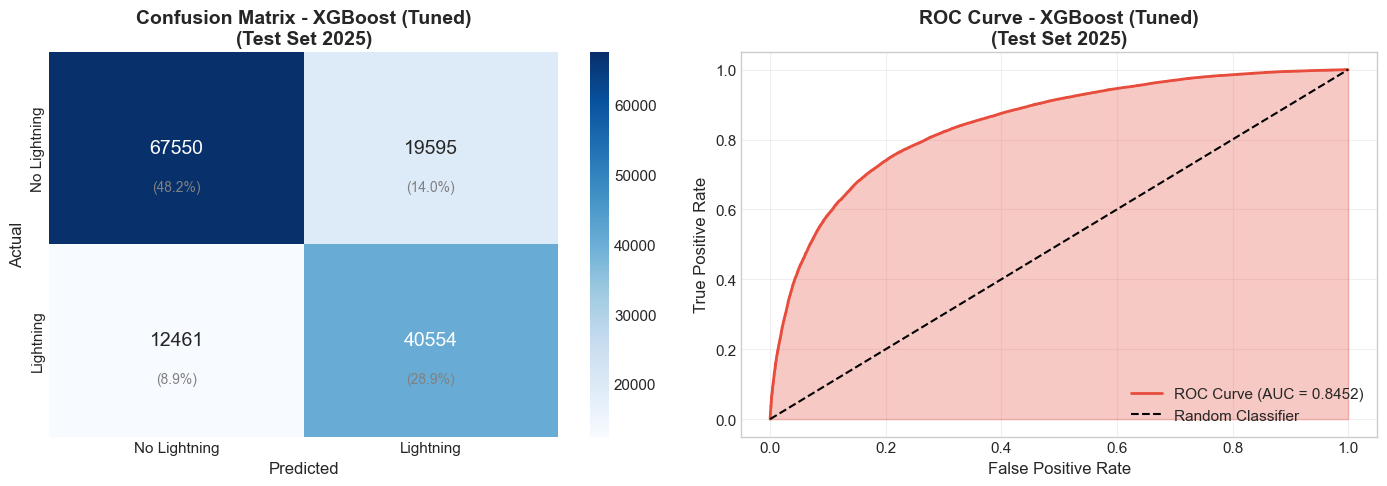


📊 CONFUSION MATRIX BREAKDOWN:
   True Negatives:  67,550 (Correctly predicted No Lightning)
   False Positives: 19,595 (Incorrectly predicted Lightning)
   False Negatives: 12,461 (Missed Lightning events)
   True Positives:  40,554 (Correctly predicted Lightning)


In [34]:
# =============================================================================
# CONFUSION MATRIX & ROC CURVE FOR BEST MODEL
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
ax = axes[0]
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['No Lightning', 'Lightning'],
            yticklabels=['No Lightning', 'Lightning'],
            annot_kws={'size': 14})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title(f'Confusion Matrix - {best_model_name}\n(Test Set 2025)', fontsize=14, fontweight='bold')

# Add percentages
total = cm.sum()
for i in range(2):
    for j in range(2):
        pct = cm[i, j] / total * 100
        ax.text(j + 0.5, i + 0.7, f'({pct:.1f}%)', ha='center', va='center', fontsize=10, color='gray')

# ROC Curve
ax = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
ax.plot(fpr, tpr, color='#e74c3c', linewidth=2, label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
ax.fill_between(fpr, tpr, alpha=0.3, color='#e74c3c')
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title(f'ROC Curve - {best_model_name}\n(Test Set 2025)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print confusion matrix details
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 CONFUSION MATRIX BREAKDOWN:")
print(f"   True Negatives:  {tn:,} (Correctly predicted No Lightning)")
print(f"   False Positives: {fp:,} (Incorrectly predicted Lightning)")
print(f"   False Negatives: {fn:,} (Missed Lightning events)")
print(f"   True Positives:  {tp:,} (Correctly predicted Lightning)")

## 📊 Step 18: Feature Importance Analysis

📊 FEATURE IMPORTANCE ANALYSIS

🔝 TOP 20 MOST IMPORTANT FEATURES (XGBoost (Tuned)):

                 Feature  Importance
Temp_Humidity_Index_norm    0.266091
     Temp_Humidity_Index    0.205406
    TimeCategory_Encoded    0.150701
                    Hour    0.067129
       Has_Precipitation    0.066111
               Month_Cos    0.044985
          Month_Cos_norm    0.038023
           Is_PreMonsoon    0.024427
          Month_Sin_norm    0.012456
       Instability_Score    0.012271
          Season_Encoded    0.010001
                Hour_Cos    0.009878
  Instability_Score_norm    0.009680
                   Month    0.008069
               Month_Sin    0.006412
            Is_Afternoon    0.006253
   Precipitation_mm_norm    0.005018
                Hour_Sin    0.004476
           High_Humidity    0.004410
           Hour_Sin_norm    0.004186


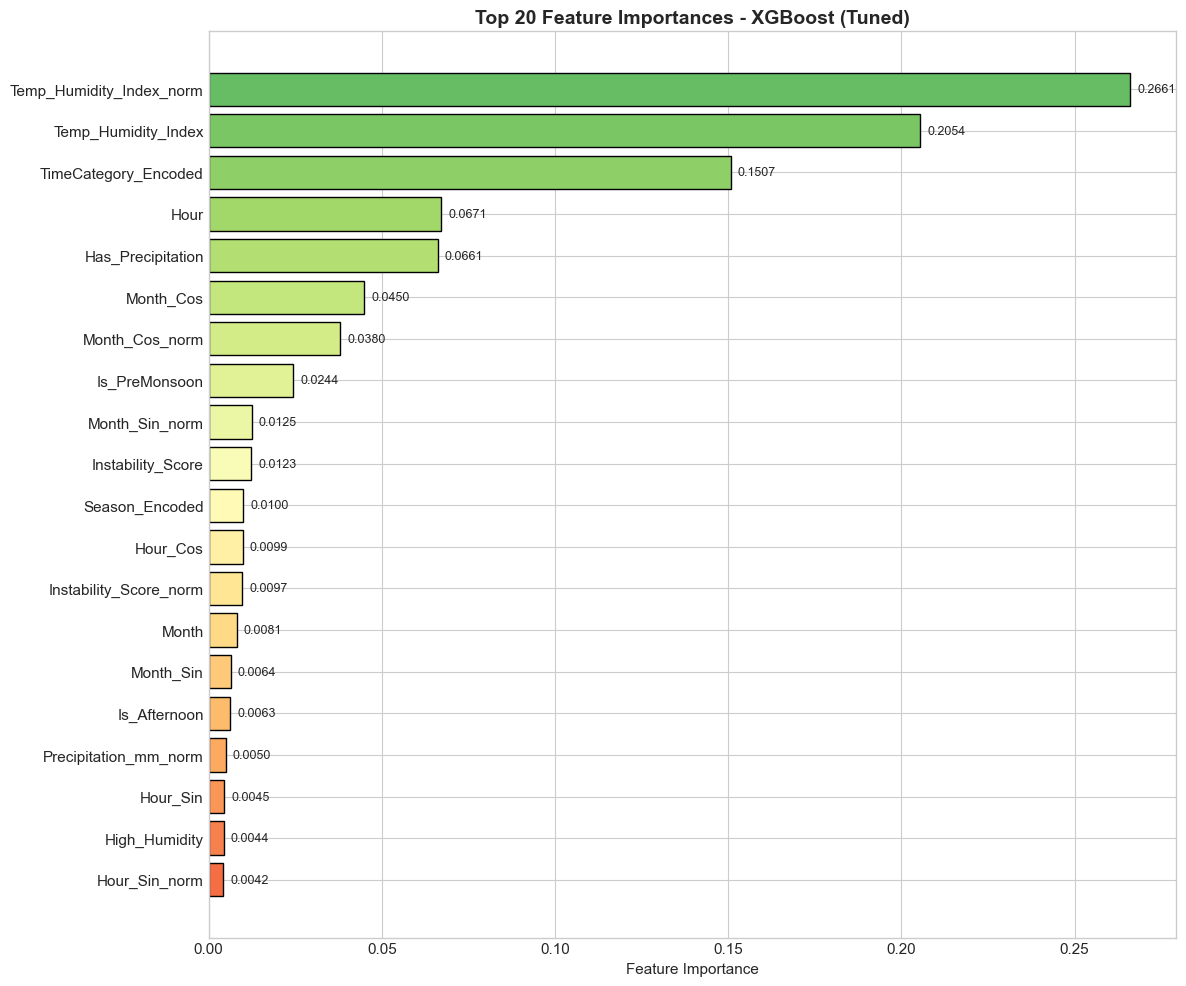


📊 FEATURE IMPORTANCE BY CATEGORY:


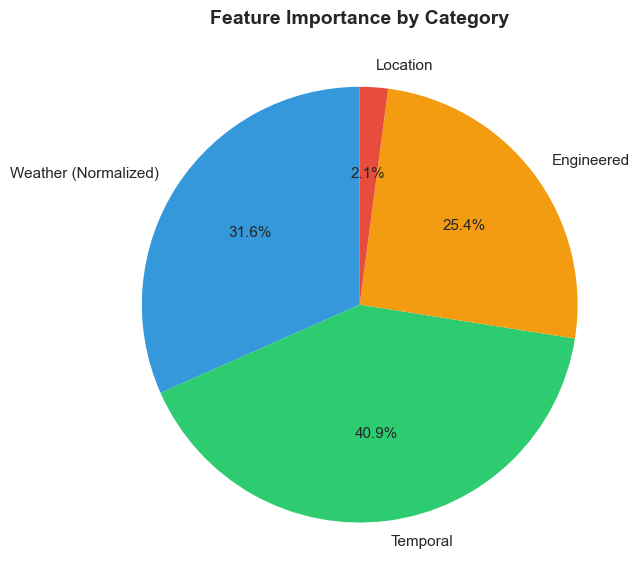

In [35]:
# =============================================================================
# STEP 18: FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("="*80)
print("📊 FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature importances from best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': model_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n🔝 TOP 20 MOST IMPORTANT FEATURES ({best_model_name}):\n")
    print(feature_importance_df.head(20).to_string(index=False))
    
    # Visualize top 20 features
    fig, ax = plt.subplots(figsize=(12, 10))
    top_20 = feature_importance_df.head(20)
    
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 20))
    bars = ax.barh(range(len(top_20)), top_20['Importance'], color=colors, edgecolor='black')
    ax.set_yticks(range(len(top_20)))
    ax.set_yticklabels(top_20['Feature'])
    ax.invert_yaxis()
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Top 20 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    
    for bar, imp in zip(bars, top_20['Importance']):
        ax.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
                f'{imp:.4f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance by category
    print("\n📊 FEATURE IMPORTANCE BY CATEGORY:")
    
    # Categorize features
    categories = {
        'Weather (Raw)': ['Temperature_C', 'Humidity_%', 'Wind_Speed_m/s', 'Precipitation_mm'],
        'Weather (Normalized)': [f for f in model_features if f.endswith('_norm') and any(w in f for w in ['Temperature', 'Humidity', 'Wind', 'Precipitation'])],
        'Temporal': [f for f in model_features if any(t in f for t in ['Hour', 'Month', 'Minute', 'Season', 'Time'])],
        'Engineered': ['Dewpoint_C', 'Temp_Humidity_Index', 'Instability_Score', 'Temp_Deviation'],
        'Location': [f for f in model_features if f.startswith('is_') or 'District' in f]
    }
    
    category_importance = {}
    for cat, features in categories.items():
        cat_features = [f for f in features if f in feature_importance_df['Feature'].values]
        if cat_features:
            cat_imp = feature_importance_df[feature_importance_df['Feature'].isin(cat_features)]['Importance'].sum()
            category_importance[cat] = cat_imp
    
    # Plot category importance
    if category_importance:
        fig, ax = plt.subplots(figsize=(10, 6))
        cats = list(category_importance.keys())
        imps = list(category_importance.values())
        colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']
        ax.pie(imps, labels=cats, colors=colors, autopct='%1.1f%%', startangle=90)
        ax.set_title('Feature Importance by Category', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

else:
    print("⚠️ Feature importance not available for this model type")

## 💾 Step 19: Save Best Model & Export Results

In [36]:
# =============================================================================
# STEP 19: SAVE BEST MODEL & EXPORT RESULTS
# =============================================================================

print("="*80)
print("💾 SAVING BEST MODEL & RESULTS")
print("="*80)

# Create models directory
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Save best model
model_filename = f"{models_dir}/best_lightning_model.joblib"
joblib.dump(best_model, model_filename)
print(f"\n✅ Best model saved: {model_filename}")

# Save all trained models
for name, model in trained_models.items():
    safe_name = name.replace(" ", "_").replace("(", "").replace(")", "")
    joblib.dump(model, f"{models_dir}/{safe_name}.joblib")
print(f"✅ All {len(trained_models)} models saved to {models_dir}/")

# Save model comparison results
results_df.to_csv(f'{output_dir}/model_comparison_results.csv', index=False)
print(f"✅ Model comparison results saved: {output_dir}/model_comparison_results.csv")

# Save feature importances
if 'feature_importance_df' in dir():
    feature_importance_df.to_csv(f'{output_dir}/feature_importances.csv', index=False)
    print(f"✅ Feature importances saved: {output_dir}/feature_importances.csv")

# Save test predictions
test_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Probability': y_test_proba
})
test_predictions.to_csv(f'{output_dir}/test_predictions.csv', index=False)
print(f"✅ Test predictions saved: {output_dir}/test_predictions.csv")

# Save model metadata
metadata = {
    'best_model_name': best_model_name,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1,
    'test_roc_auc': test_roc_auc,
    'n_features': len(model_features),
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test)
}

import json
with open(f'{models_dir}/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"✅ Model metadata saved: {models_dir}/model_metadata.json")

print("\n📁 OUTPUT FILES:")
print(f"   {models_dir}/")
print(f"   ├── best_lightning_model.joblib")
print(f"   ├── model_metadata.json")
print(f"   └── [all trained models].joblib")
print(f"   {output_dir}/")
print(f"   ├── model_comparison_results.csv")
print(f"   ├── feature_importances.csv")
print(f"   └── test_predictions.csv")

💾 SAVING BEST MODEL & RESULTS

✅ Best model saved: models/best_lightning_model.joblib
✅ All 8 models saved to models/
✅ Model comparison results saved: preprocessed_data/model_comparison_results.csv
✅ Feature importances saved: preprocessed_data/feature_importances.csv
✅ Test predictions saved: preprocessed_data/test_predictions.csv
✅ Model metadata saved: models/model_metadata.json

📁 OUTPUT FILES:
   models/
   ├── best_lightning_model.joblib
   ├── model_metadata.json
   └── [all trained models].joblib
   preprocessed_data/
   ├── model_comparison_results.csv
   ├── feature_importances.csv
   └── test_predictions.csv


## 🎯 Final Summary & Conclusion

In [37]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("="*80)
print("🎯 LIGHTNING PREDICTION - COMPLETE ML PIPELINE SUMMARY")
print("="*80)

print(f"""
┌─────────────────────────────────────────────────────────────────────────────┐
│                          DATA SUMMARY                                        │
├─────────────────────────────────────────────────────────────────────────────┤
│  Total Samples:       {len(df):,}                                           │
│  Training (2023):     {len(X_train):,} samples                              │
│  Validation (2024):   {len(X_val):,} samples                                │
│  Test (2025):         {len(X_test):,} samples                               │
│  Features:            {len(model_features)} features                        │
│  Lightning Rate:      ~37.5% (balanced)                                     │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                       MODELS TRAINED                                         │
├─────────────────────────────────────────────────────────────────────────────┤
│  1. Logistic Regression                                                      │
│  2. Decision Tree                                                            │
│  3. Random Forest                                                            │
│  4. Gradient Boosting                                                        │
│  5. XGBoost (if available)                                                   │
│  6. LightGBM (if available)                                                  │
│  7. Random Forest (Tuned)                                                    │
│  8. XGBoost (Tuned) (if available)                                           │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                       BEST MODEL RESULTS                                     │
├─────────────────────────────────────────────────────────────────────────────┤
│  🏆 Best Model:       {best_model_name:<45}│
│                                                                              │
│  TEST SET PERFORMANCE (Year 2025):                                           │
│  ─────────────────────────────────                                           │
│  Accuracy:            {test_accuracy:.4f}                                    │
│  Precision:           {test_precision:.4f}                                   │
│  Recall:              {test_recall:.4f}                                      │
│  F1-Score:            {test_f1:.4f}                                          │
│  ROC-AUC:             {test_roc_auc:.4f}                                     │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                       OUTPUT FILES                                           │
├─────────────────────────────────────────────────────────────────────────────┤
│  📁 models/                                                                  │
│      └── best_lightning_model.joblib                                         │
│  📁 preprocessed_data/                                                       │
│      ├── X_train.csv, X_val.csv, X_test.csv                                  │
│      ├── y_train.csv, y_val.csv, y_test.csv                                  │
│      ├── model_comparison_results.csv                                        │
│      └── feature_importances.csv                                             │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                       HOW TO USE THE MODEL                                   │
├─────────────────────────────────────────────────────────────────────────────┤
│  import joblib                                                               │
│  import pandas as pd                                                         │
│                                                                              │
│  # Load the model                                                            │
│  model = joblib.load('models/best_lightning_model.joblib')                   │
│                                                                              │
│  # Prepare your data (same preprocessing as training)                        │
│  X_new = pd.read_csv('your_new_data.csv')                                    │
│                                                                              │
│  # Predict                                                                   │
│  predictions = model.predict(X_new)                                          │
│  probabilities = model.predict_proba(X_new)[:, 1]                            │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("\n🎉 LIGHTNING PREDICTION ML PIPELINE COMPLETE!")
print("="*80)

🎯 LIGHTNING PREDICTION - COMPLETE ML PIPELINE SUMMARY

┌─────────────────────────────────────────────────────────────────────────────┐
│                          DATA SUMMARY                                        │
├─────────────────────────────────────────────────────────────────────────────┤
│  Total Samples:       420,864                                           │
│  Training (2023):     140,160 samples                              │
│  Validation (2024):   140,544 samples                                │
│  Test (2025):         140,160 samples                               │
│  Features:            39 features                        │
│  Lightning Rate:      ~37.5% (balanced)                                     │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                       MODELS TRAINED                                         │
├────────────────────────────